In [ ]:
!pip install -U finance-datareader

In [ ]:
#라이브러리
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

1. 수익률 및 모멘텀 계산: 개별 주식의 월별 수익률을 활용하여 1개월, 3개월, 6개월, 9개월, 12개월 등의 모멘텀을 계산하시오. KOSPI지수와 임의의 한 주식을 선택하여 결과를 보여줄 것.

In [ ]:
#데이터 불러오기
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [ ]:
len(df_krx)

6381

In [ ]:
#데이터전처리(상장사만 남기기)
df_krx.drop('HomePage',axis=1,inplace=True)
df_krx.dropna(axis=0,inplace=True)
df_krx.reset_index(drop=True)
len(df_krx)

2463

In [ ]:
df_krx.reset_index(drop=True)
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,경기도
...,...,...,...,...,...,...,...,...,...
6374,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",서울특별시
6375,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,서울특별시
6378,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,서울특별시
6379,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",서울특별시


In [ ]:
tickers = df_krx.Symbol

In [ ]:
#데이터 수집
'''
tickers.reset_index(drop=True)
stocks = pd.DataFrame()

for ticker in tickers:
    data_temp = fdr.DataReader(ticker, '20100101','20211130')['Close']
    stocks = pd.concat([stocks,data_temp],axis=1)

stocks.to_excel('stocks.xlsx')
stocks.head()
'''

"\ntickers.reset_index(drop=True)\nstocks = pd.DataFrame()\n\nfor ticker in tickers:\n    data_temp = fdr.DataReader(ticker, '20100101','20211130')['Close']\n    stocks = pd.concat([stocks,data_temp],axis=1)\n\nstocks.to_excel('stocks.xlsx')\nstocks.head()\n"

In [ ]:
stocks = pd.read_excel('/content/drive/MyDrive/stocks.xlsx')
stocks.head()

,Unnamed: 0,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,Close.7,Close.8,Close.9,Close.10,Close.11,Close.12,Close.13,Close.14,Close.15,Close.16,Close.17,Close.18,Close.19,Close.20,Close.21,Close.22,Close.23,Close.24,Close.25,Close.26,Close.27,Close.28,Close.29,Close.30,Close.31,Close.32,Close.33,Close.34,Close.35,Close.36,Close.37,Close.38,...,Close.2422,Close.2423,Close.2424,Close.2425,Close.2426,Close.2427,Close.2428,Close.2429,Close.2430,Close.2431,Close.2432,Close.2433,Close.2434,Close.2435,Close.2436,Close.2437,Close.2438,Close.2439,Close.2440,Close.2441,Close.2442,Close.2443,Close.2444,Close.2445,Close.2446,Close.2447,Close.2448,Close.2449,Close.2450,Close.2451,Close.2452,Close.2453,Close.2454,Close.2455,Close.2456,Close.2457,Close.2458,Close.2459,Close.2460,Close.2461
0,2010-01-04,1282,NaN,10331,3282,NaN,NaN,NaN,NaN,32624,NaN,125000,279,58652,19139,141935,54500,1065,207000,14250,2820,1290,25650,7800,3660,2849,39450,1301,NaN,NaN,6890,34200,7500,NaN,41263,77078,7847,NaN,8160,3694,...,1315,34000,6554,5620,50480,4830,3019,NaN,NaN,NaN,NaN,3726,2140,NaN,NaN,7170,NaN,561,NaN,17759,14200,1492463,NaN,NaN,NaN,4350,NaN,15900,NaN,5355,NaN,NaN,17885,2655,2330,NaN,6850,6883,10900,NaN
1,2010-01-05,1277,NaN,10206,3278,NaN,NaN,NaN,NaN,32766,NaN,126000,282,59595,19230,142674,54400,1045,220000,14150,2810,1290,24988,8300,3360,2854,39450,1309,NaN,NaN,6830,33600,7550,NaN,41662,76355,7890,NaN,8780,3573,...,1320,33500,6579,5564,52255,5550,2926,NaN,NaN,NaN,NaN,3702,2265,NaN,NaN,7430,NaN,573,NaN,17390,13950,1460527,NaN,NaN,NaN,4400,NaN,16100,NaN,5387,NaN,NaN,17312,2670,2195,NaN,6630,6839,10550,NaN
2,2010-01-06,1307,NaN,10206,3275,NaN,NaN,NaN,NaN,32837,NaN,124500,275,59595,19593,143970,56400,1025,220500,13950,2721,1275,25798,8300,3300,2903,39450,1309,NaN,NaN,6890,35450,7410,NaN,41617,77892,7868,NaN,8700,3573,...,1325,33700,6479,5632,54859,5900,2954,NaN,NaN,NaN,NaN,3755,2260,NaN,NaN,7700,NaN,602,NaN,17067,13500,1460527,NaN,NaN,NaN,4305,NaN,16600,NaN,5387,NaN,NaN,17613,2700,2150,NaN,6690,6795,10200,NaN
3,2010-01-07,1431,NaN,10300,3323,NaN,NaN,NaN,NaN,32766,NaN,127000,273,60444,19729,140084,56600,1055,218000,13950,2684,1275,28305,8140,3130,2982,39450,1298,NaN,NaN,6920,35650,7460,NaN,42593,77711,7858,NaN,9440,3469,...,1315,34200,6429,5944,53143,5600,2974,NaN,NaN,NaN,NaN,3785,2235,NaN,NaN,7610,NaN,616,NaN,17206,13150,1376026,NaN,NaN,NaN,4220,NaN,16650,NaN,5368,NaN,NaN,17312,2680,2150,NaN,6500,7344,10100,NaN
4,2010-01-08,1391,NaN,10362,3442,NaN,NaN,NaN,NaN,32766,NaN,127500,276,63556,20681,137123,57600,1040,218000,13800,2666,1270,27419,8210,3240,3026,39450,1270,NaN,NaN,7080,35300,7510,NaN,42593,78524,7805,NaN,9500,3469,...,1325,35050,6554,5888,55037,5800,2974,NaN,NaN,NaN,NaN,3804,2235,NaN,NaN,7560,NaN,641,NaN,17067,13350,1333577,NaN,NaN,NaN,4205,NaN,16600,NaN,5368,NaN,NaN,17432,2680,2150,NaN,6440,7289,10100,NaN


In [ ]:
#칼럼명 바꾸기
names = df_krx.Name

stockname = []
for name in names:
  stockname.append(name)

stockcolumns = dict(zip(stocks.columns[1:],stockname))

stocks.rename(columns=stockcolumns,inplace=True)
stocks.head()

,Unnamed: 0,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BNK금융지주,BYC,CBI,CJ,CJ CGV,CJ ENM,CJ대한통운,CJ씨푸드,CJ제일제당,CJ프레시웨이,CMG제약,CNH,CNT85,COWON,CS,CSA 코스믹,CS홀딩스,DB,DB금융스팩8호,DB금융스팩9호,DB금융투자,DB손해보험,DB하이텍,DGB금융지주,DI동일,DL,DL건설,DL이앤씨,DMS,DRB동일,...,화일약품,화천기계,화천기공,환인제약,황금에스티,효성,효성ITX,효성오앤비,효성중공업,효성첨단소재,효성티앤씨,효성화학,후성,휘닉스소재,휠라홀딩스,휴네시온,휴니드,휴럼,휴림로봇,휴마시스,휴맥스,휴맥스홀딩스,휴먼엔,휴메딕스,휴벡셀,휴비스,휴비츠,휴센텍,휴스틸,휴온스,휴온스글로벌,휴온스블러썸,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림
0,2010-01-04,1282,NaN,10331,3282,NaN,NaN,NaN,NaN,32624,NaN,125000,279,58652,19139,141935,54500,1065,207000,14250,2820,1290,25650,7800,3660,2849,39450,1301,NaN,NaN,6890,34200,7500,NaN,41263,77078,7847,NaN,8160,3694,...,1315,34000,6554,5620,50480,4830,3019,NaN,NaN,NaN,NaN,3726,2140,NaN,NaN,7170,NaN,561,NaN,17759,14200,1492463,NaN,NaN,NaN,4350,NaN,15900,NaN,5355,NaN,NaN,17885,2655,2330,NaN,6850,6883,10900,NaN
1,2010-01-05,1277,NaN,10206,3278,NaN,NaN,NaN,NaN,32766,NaN,126000,282,59595,19230,142674,54400,1045,220000,14150,2810,1290,24988,8300,3360,2854,39450,1309,NaN,NaN,6830,33600,7550,NaN,41662,76355,7890,NaN,8780,3573,...,1320,33500,6579,5564,52255,5550,2926,NaN,NaN,NaN,NaN,3702,2265,NaN,NaN,7430,NaN,573,NaN,17390,13950,1460527,NaN,NaN,NaN,4400,NaN,16100,NaN,5387,NaN,NaN,17312,2670,2195,NaN,6630,6839,10550,NaN
2,2010-01-06,1307,NaN,10206,3275,NaN,NaN,NaN,NaN,32837,NaN,124500,275,59595,19593,143970,56400,1025,220500,13950,2721,1275,25798,8300,3300,2903,39450,1309,NaN,NaN,6890,35450,7410,NaN,41617,77892,7868,NaN,8700,3573,...,1325,33700,6479,5632,54859,5900,2954,NaN,NaN,NaN,NaN,3755,2260,NaN,NaN,7700,NaN,602,NaN,17067,13500,1460527,NaN,NaN,NaN,4305,NaN,16600,NaN,5387,NaN,NaN,17613,2700,2150,NaN,6690,6795,10200,NaN
3,2010-01-07,1431,NaN,10300,3323,NaN,NaN,NaN,NaN,32766,NaN,127000,273,60444,19729,140084,56600,1055,218000,13950,2684,1275,28305,8140,3130,2982,39450,1298,NaN,NaN,6920,35650,7460,NaN,42593,77711,7858,NaN,9440,3469,...,1315,34200,6429,5944,53143,5600,2974,NaN,NaN,NaN,NaN,3785,2235,NaN,NaN,7610,NaN,616,NaN,17206,13150,1376026,NaN,NaN,NaN,4220,NaN,16650,NaN,5368,NaN,NaN,17312,2680,2150,NaN,6500,7344,10100,NaN
4,2010-01-08,1391,NaN,10362,3442,NaN,NaN,NaN,NaN,32766,NaN,127500,276,63556,20681,137123,57600,1040,218000,13800,2666,1270,27419,8210,3240,3026,39450,1270,NaN,NaN,7080,35300,7510,NaN,42593,78524,7805,NaN,9500,3469,...,1325,35050,6554,5888,55037,5800,2974,NaN,NaN,NaN,NaN,3804,2235,NaN,NaN,7560,NaN,641,NaN,17067,13350,1333577,NaN,NaN,NaN,4205,NaN,16600,NaN,5368,NaN,NaN,17432,2680,2150,NaN,6440,7289,10100,NaN


In [ ]:
#인덱스 설정
stocks.set_index('Unnamed: 0',inplace=True)
index = pd.to_datetime(stocks.index)
stocks.index = index
print(stocks.index)
stocks.head()

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=2940, freq=None)


,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BNK금융지주,BYC,CBI,CJ,CJ CGV,CJ ENM,CJ대한통운,CJ씨푸드,CJ제일제당,CJ프레시웨이,CMG제약,CNH,CNT85,COWON,CS,CSA 코스믹,CS홀딩스,DB,DB금융스팩8호,DB금융스팩9호,DB금융투자,DB손해보험,DB하이텍,DGB금융지주,DI동일,DL,DL건설,DL이앤씨,DMS,DRB동일,DSC인베스트먼트,...,화일약품,화천기계,화천기공,환인제약,황금에스티,효성,효성ITX,효성오앤비,효성중공업,효성첨단소재,효성티앤씨,효성화학,후성,휘닉스소재,휠라홀딩스,휴네시온,휴니드,휴럼,휴림로봇,휴마시스,휴맥스,휴맥스홀딩스,휴먼엔,휴메딕스,휴벡셀,휴비스,휴비츠,휴센텍,휴스틸,휴온스,휴온스글로벌,휴온스블러썸,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,1282,NaN,10331,3282,NaN,NaN,NaN,NaN,32624,NaN,125000,279,58652,19139,141935,54500,1065,207000,14250,2820,1290,25650,7800,3660,2849,39450,1301,NaN,NaN,6890,34200,7500,NaN,41263,77078,7847,NaN,8160,3694,NaN,...,1315,34000,6554,5620,50480,4830,3019,NaN,NaN,NaN,NaN,3726,2140,NaN,NaN,7170,NaN,561,NaN,17759,14200,1492463,NaN,NaN,NaN,4350,NaN,15900,NaN,5355,NaN,NaN,17885,2655,2330,NaN,6850,6883,10900,NaN
2010-01-05,1277,NaN,10206,3278,NaN,NaN,NaN,NaN,32766,NaN,126000,282,59595,19230,142674,54400,1045,220000,14150,2810,1290,24988,8300,3360,2854,39450,1309,NaN,NaN,6830,33600,7550,NaN,41662,76355,7890,NaN,8780,3573,NaN,...,1320,33500,6579,5564,52255,5550,2926,NaN,NaN,NaN,NaN,3702,2265,NaN,NaN,7430,NaN,573,NaN,17390,13950,1460527,NaN,NaN,NaN,4400,NaN,16100,NaN,5387,NaN,NaN,17312,2670,2195,NaN,6630,6839,10550,NaN
2010-01-06,1307,NaN,10206,3275,NaN,NaN,NaN,NaN,32837,NaN,124500,275,59595,19593,143970,56400,1025,220500,13950,2721,1275,25798,8300,3300,2903,39450,1309,NaN,NaN,6890,35450,7410,NaN,41617,77892,7868,NaN,8700,3573,NaN,...,1325,33700,6479,5632,54859,5900,2954,NaN,NaN,NaN,NaN,3755,2260,NaN,NaN,7700,NaN,602,NaN,17067,13500,1460527,NaN,NaN,NaN,4305,NaN,16600,NaN,5387,NaN,NaN,17613,2700,2150,NaN,6690,6795,10200,NaN
2010-01-07,1431,NaN,10300,3323,NaN,NaN,NaN,NaN,32766,NaN,127000,273,60444,19729,140084,56600,1055,218000,13950,2684,1275,28305,8140,3130,2982,39450,1298,NaN,NaN,6920,35650,7460,NaN,42593,77711,7858,NaN,9440,3469,NaN,...,1315,34200,6429,5944,53143,5600,2974,NaN,NaN,NaN,NaN,3785,2235,NaN,NaN,7610,NaN,616,NaN,17206,13150,1376026,NaN,NaN,NaN,4220,NaN,16650,NaN,5368,NaN,NaN,17312,2680,2150,NaN,6500,7344,10100,NaN
2010-01-08,1391,NaN,10362,3442,NaN,NaN,NaN,NaN,32766,NaN,127500,276,63556,20681,137123,57600,1040,218000,13800,2666,1270,27419,8210,3240,3026,39450,1270,NaN,NaN,7080,35300,7510,NaN,42593,78524,7805,NaN,9500,3469,NaN,...,1325,35050,6554,5888,55037,5800,2974,NaN,NaN,NaN,NaN,3804,2235,NaN,NaN,7560,NaN,641,NaN,17067,13350,1333577,NaN,NaN,NaN,4205,NaN,16600,NaN,5368,NaN,NaN,17432,2680,2150,NaN,6440,7289,10100,NaN


In [ ]:
#KOSPI 데이터 받기
kospi = fdr.DataReader('KS11','20100101','20211130')['Close']
stocks = pd.concat([stocks,kospi],axis=1)

In [ ]:
stocks.rename(columns={'Close':'KOSPI'},inplace=True)
stocks.head()

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BNK금융지주,BYC,CBI,CJ,CJ CGV,CJ ENM,CJ대한통운,CJ씨푸드,CJ제일제당,CJ프레시웨이,CMG제약,CNH,CNT85,COWON,CS,CSA 코스믹,CS홀딩스,DB,DB금융스팩8호,DB금융스팩9호,DB금융투자,DB손해보험,DB하이텍,DGB금융지주,DI동일,DL,DL건설,DL이앤씨,DMS,DRB동일,DSC인베스트먼트,...,화천기계,화천기공,환인제약,황금에스티,효성,효성ITX,효성오앤비,효성중공업,효성첨단소재,효성티앤씨,효성화학,후성,휘닉스소재,휠라홀딩스,휴네시온,휴니드,휴럼,휴림로봇,휴마시스,휴맥스,휴맥스홀딩스,휴먼엔,휴메딕스,휴벡셀,휴비스,휴비츠,휴센텍,휴스틸,휴온스,휴온스글로벌,휴온스블러썸,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림,KOSPI
2010-01-04,1282.0,NaN,10331.0,3282.0,NaN,NaN,NaN,NaN,32624.0,NaN,125000.0,279.0,58652.0,19139.0,141935.0,54500.0,1065.0,207000.0,14250.0,2820.0,1290.0,25650.0,7800.0,3660.0,2849.0,39450.0,1301.0,NaN,NaN,6890.0,34200.0,7500.0,NaN,41263.0,77078.0,7847.0,NaN,8160.0,3694.0,NaN,...,34000.0,6554.0,5620.0,50480.0,4830.0,3019.0,NaN,NaN,NaN,NaN,3726.0,2140.0,NaN,NaN,7170.0,NaN,561.0,NaN,17759.0,14200.0,1492463.0,NaN,NaN,NaN,4350.0,NaN,15900.0,NaN,5355.0,NaN,NaN,17885.0,2655.0,2330.0,NaN,6850.0,6883.0,10900.0,NaN,1696.14
2010-01-05,1277.0,NaN,10206.0,3278.0,NaN,NaN,NaN,NaN,32766.0,NaN,126000.0,282.0,59595.0,19230.0,142674.0,54400.0,1045.0,220000.0,14150.0,2810.0,1290.0,24988.0,8300.0,3360.0,2854.0,39450.0,1309.0,NaN,NaN,6830.0,33600.0,7550.0,NaN,41662.0,76355.0,7890.0,NaN,8780.0,3573.0,NaN,...,33500.0,6579.0,5564.0,52255.0,5550.0,2926.0,NaN,NaN,NaN,NaN,3702.0,2265.0,NaN,NaN,7430.0,NaN,573.0,NaN,17390.0,13950.0,1460527.0,NaN,NaN,NaN,4400.0,NaN,16100.0,NaN,5387.0,NaN,NaN,17312.0,2670.0,2195.0,NaN,6630.0,6839.0,10550.0,NaN,1690.62
2010-01-06,1307.0,NaN,10206.0,3275.0,NaN,NaN,NaN,NaN,32837.0,NaN,124500.0,275.0,59595.0,19593.0,143970.0,56400.0,1025.0,220500.0,13950.0,2721.0,1275.0,25798.0,8300.0,3300.0,2903.0,39450.0,1309.0,NaN,NaN,6890.0,35450.0,7410.0,NaN,41617.0,77892.0,7868.0,NaN,8700.0,3573.0,NaN,...,33700.0,6479.0,5632.0,54859.0,5900.0,2954.0,NaN,NaN,NaN,NaN,3755.0,2260.0,NaN,NaN,7700.0,NaN,602.0,NaN,17067.0,13500.0,1460527.0,NaN,NaN,NaN,4305.0,NaN,16600.0,NaN,5387.0,NaN,NaN,17613.0,2700.0,2150.0,NaN,6690.0,6795.0,10200.0,NaN,1705.32
2010-01-07,1431.0,NaN,10300.0,3323.0,NaN,NaN,NaN,NaN,32766.0,NaN,127000.0,273.0,60444.0,19729.0,140084.0,56600.0,1055.0,218000.0,13950.0,2684.0,1275.0,28305.0,8140.0,3130.0,2982.0,39450.0,1298.0,NaN,NaN,6920.0,35650.0,7460.0,NaN,42593.0,77711.0,7858.0,NaN,9440.0,3469.0,NaN,...,34200.0,6429.0,5944.0,53143.0,5600.0,2974.0,NaN,NaN,NaN,NaN,3785.0,2235.0,NaN,NaN,7610.0,NaN,616.0,NaN,17206.0,13150.0,1376026.0,NaN,NaN,NaN,4220.0,NaN,16650.0,NaN,5368.0,NaN,NaN,17312.0,2680.0,2150.0,NaN,6500.0,7344.0,10100.0,NaN,1683.45
2010-01-08,1391.0,NaN,10362.0,3442.0,NaN,NaN,NaN,NaN,32766.0,NaN,127500.0,276.0,63556.0,20681.0,137123.0,57600.0,1040.0,218000.0,13800.0,2666.0,1270.0,27419.0,8210.0,3240.0,3026.0,39450.0,1270.0,NaN,NaN,7080.0,35300.0,7510.0,NaN,42593.0,78524.0,7805.0,NaN,9500.0,3469.0,NaN,...,35050.0,6554.0,5888.0,55037.0,5800.0,2974.0,NaN,NaN,NaN,NaN,3804.0,2235.0,NaN,NaN,7560.0,NaN,641.0,NaN,17067.0,13350.0,1333577.0,NaN,NaN,NaN,4205.0,NaN,16600.0,NaN,5368.0,NaN,NaN,17432.0,2680.0,2150.0,NaN,6440.0,7289.0,10100.0,NaN,1695.26


In [ ]:
#가격 데이터의 frequency를 monthly로 변경
stocks_m = stocks.resample('M').last()
stocks_m.head()

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BNK금융지주,BYC,CBI,CJ,CJ CGV,CJ ENM,CJ대한통운,CJ씨푸드,CJ제일제당,CJ프레시웨이,CMG제약,CNH,CNT85,COWON,CS,CSA 코스믹,CS홀딩스,DB,DB금융스팩8호,DB금융스팩9호,DB금융투자,DB손해보험,DB하이텍,DGB금융지주,DI동일,DL,DL건설,DL이앤씨,DMS,DRB동일,DSC인베스트먼트,...,화천기계,화천기공,환인제약,황금에스티,효성,효성ITX,효성오앤비,효성중공업,효성첨단소재,효성티앤씨,효성화학,후성,휘닉스소재,휠라홀딩스,휴네시온,휴니드,휴럼,휴림로봇,휴마시스,휴맥스,휴맥스홀딩스,휴먼엔,휴메딕스,휴벡셀,휴비스,휴비츠,휴센텍,휴스틸,휴온스,휴온스글로벌,휴온스블러썸,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림,KOSPI
2010-01-31,1386.0,NaN,9955.0,3427.0,NaN,NaN,NaN,NaN,38865.0,NaN,126000.0,260.0,63367.0,19502.0,118062.0,53800.0,1015.0,209000.0,13100.0,2090.0,1260.0,35602.0,6630.0,3020.0,2942.0,59900.0,1190.0,NaN,NaN,6180.0,33550.0,6080.0,NaN,42015.0,69307.0,6980.0,NaN,7900.0,3004.0,NaN,...,35300.0,6604.0,5832.0,48113.0,5090.0,2871.0,NaN,NaN,NaN,NaN,3775.0,1800.0,NaN,NaN,6570.0,NaN,606.0,NaN,16421.0,11750.0,984264.0,NaN,NaN,NaN,4090.0,NaN,16100.0,NaN,5008.0,NaN,NaN,16859.0,2380.0,2028.0,NaN,6200.0,8103.0,9330.0,NaN,1602.43
2010-02-28,1386.0,NaN,9580.0,3919.0,NaN,NaN,NaN,NaN,63972.0,NaN,142500.0,257.0,64876.0,20772.0,124169.0,56100.0,1065.0,209500.0,12300.0,1594.0,1245.0,31472.0,6630.0,3600.0,2800.0,54300.0,1214.0,NaN,NaN,6080.0,31500.0,6250.0,NaN,43480.0,64428.0,6240.0,NaN,7860.0,3256.0,NaN,...,36200.0,7305.0,5960.0,51782.0,5600.0,2686.0,NaN,NaN,NaN,NaN,3932.0,2340.0,NaN,NaN,4745.0,NaN,690.0,NaN,14392.0,11550.0,1026713.0,NaN,NaN,NaN,4280.0,NaN,15750.0,NaN,4649.0,NaN,NaN,16829.0,2295.0,2050.0,NaN,6050.0,7993.0,9460.0,NaN,1594.58
2010-03-31,1772.0,NaN,11145.0,4500.0,NaN,NaN,NaN,NaN,22908.0,NaN,145500.0,287.0,63556.0,21588.0,133237.0,66100.0,1715.0,225000.0,13000.0,1252.0,1200.0,34203.0,7600.0,4395.0,3629.0,230500.0,1286.0,NaN,NaN,6040.0,32300.0,7370.0,NaN,46587.0,67771.0,5870.0,NaN,9530.0,3147.0,NaN,...,38850.0,7305.0,5780.0,48053.0,5140.0,2755.0,NaN,NaN,NaN,NaN,3790.0,2100.0,NaN,NaN,6300.0,NaN,710.0,NaN,14438.0,10550.0,529225.0,NaN,NaN,NaN,4980.0,NaN,16500.0,NaN,4820.0,NaN,NaN,16813.0,2700.0,2000.0,NaN,7100.0,9104.0,9390.0,NaN,1692.85
2010-04-30,1911.0,NaN,11364.0,5797.0,NaN,NaN,NaN,NaN,23972.0,NaN,154500.0,312.0,60821.0,21135.0,154148.0,62400.0,4180.0,222000.0,13200.0,1207.0,1320.0,32506.0,7930.0,3555.0,3183.0,89700.0,1305.0,NaN,NaN,6010.0,35300.0,8420.0,NaN,50490.0,57651.0,5246.0,NaN,14200.0,2842.0,NaN,...,41650.0,7450.0,6162.0,46811.0,5140.0,2628.0,NaN,NaN,NaN,NaN,3618.0,1985.0,NaN,NaN,5790.0,NaN,675.0,NaN,15176.0,10450.0,370537.0,NaN,NaN,NaN,4160.0,NaN,16250.0,NaN,4113.0,NaN,NaN,16531.0,2750.0,2120.0,NaN,5760.0,11116.0,9260.0,NaN,1741.56
2010-05-31,1782.0,NaN,11364.0,6937.0,NaN,NaN,NaN,NaN,18156.0,NaN,147000.0,309.0,57144.0,21906.0,165991.0,55500.0,3020.0,214000.0,11750.0,1009.0,1230.0,30073.0,5400.0,2950.0,2879.0,89400.0,1139.0,NaN,NaN,5500.0,33100.0,10600.0,NaN,49248.0,51777.0,4569.0,NaN,15750.0,2490.0,NaN,...,40350.0,7350.0,5277.0,40183.0,4575.0,2532.0,NaN,NaN,NaN,NaN,3153.0,2020.0,NaN,NaN,5780.0,NaN,725.0,NaN,12547.0,8370.0,306864.0,NaN,NaN,NaN,3890.0,NaN,15700.0,NaN,3872.0,NaN,NaN,15028.0,2360.0,1768.0,NaN,5950.0,9104.0,7700.0,NaN,1641.25


In [ ]:
#연속시간 수익률 계산 함수
def log_return(data, period):
  rtn = (np.log(data) - np.log(data.shift(period)))
  rtn.columns = data.columns
  return rtn

In [ ]:
rtn_1 = log_return(stocks_m,1)
rtn_3 = log_return(stocks_m,3)
rtn_6 = log_return(stocks_m,6)
rtn_9 = log_return(stocks_m,9)
rtn_12 = log_return(stocks_m,12)
rtn_12.tail()

,3S,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BNK금융지주,BYC,CBI,CJ,CJ CGV,CJ ENM,CJ대한통운,CJ씨푸드,CJ제일제당,CJ프레시웨이,CMG제약,CNH,CNT85,COWON,CS,CSA 코스믹,CS홀딩스,DB,DB금융스팩8호,DB금융스팩9호,DB금융투자,DB손해보험,DB하이텍,DGB금융지주,DI동일,DL,DL건설,DL이앤씨,DMS,DRB동일,DSC인베스트먼트,...,화천기계,화천기공,환인제약,황금에스티,효성,효성ITX,효성오앤비,효성중공업,효성첨단소재,효성티앤씨,효성화학,후성,휘닉스소재,휠라홀딩스,휴네시온,휴니드,휴럼,휴림로봇,휴마시스,휴맥스,휴맥스홀딩스,휴먼엔,휴메딕스,휴벡셀,휴비스,휴비츠,휴센텍,휴스틸,휴온스,휴온스글로벌,휴온스블러썸,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림,KOSPI
2021-07-31,0.289717,0.608129,0.431890,0.820981,0.124273,0.712899,0.385472,0.260199,0.0,0.410640,0.655968,1.736190,0.173382,0.402075,0.348562,0.140046,0.269740,0.192631,0.806888,0.101449,0.840917,0.0,0.414245,0.659309,-0.976763,0.045950,0.542099,NaN,NaN,0.647162,0.192531,0.581576,0.607018,1.439702,0.042289,0.201002,NaN,0.254391,0.095310,0.940113,...,0.151231,0.335538,0.618194,0.584201,-0.160582,0.558188,0.590088,1.537193,2.058294,1.299708,0.473647,0.906647,0.446527,0.389215,0.069569,-0.164055,0.297438,0.349225,0.243868,0.523473,0.870434,0.163397,-0.392703,0.582546,0.316607,0.930194,0.693854,0.097458,0.745816,0.0,0.420018,0.386263,0.135192,0.941963,1.034643,0.625443,0.000000,0.627921,-0.143101,0.353225
2021-08-31,0.453022,0.635613,0.510826,0.820518,0.254781,0.808402,0.434313,0.336472,0.0,0.423671,0.523855,1.236731,0.225610,0.320105,0.254492,0.121078,-0.332750,0.108182,0.805557,0.002225,0.909690,0.0,0.235457,0.702313,-0.941671,0.146441,0.397441,NaN,NaN,0.614815,0.296236,0.520066,0.542456,1.439945,-0.082580,0.209308,NaN,-0.059571,-0.271787,0.699632,...,0.232932,0.210405,0.464889,0.582799,-0.258041,0.074338,0.620259,1.515450,2.069453,1.356685,0.546544,0.421650,0.257698,0.279146,0.271153,-0.272453,0.314091,0.209092,0.261171,0.821278,0.297808,0.186204,0.530317,0.100033,0.371079,0.906240,0.931239,-0.139747,0.721959,0.0,0.174353,0.393389,0.202469,0.763661,0.614622,0.563743,0.000000,0.559616,-0.117783,0.318700
2021-09-30,0.660790,0.587615,0.428929,0.646683,0.123561,0.897993,0.382324,0.322494,0.0,0.557920,0.678630,0.699226,0.196182,0.279856,0.061988,-0.148533,-0.123968,0.036051,0.688713,-0.089577,0.757182,0.0,0.248820,0.536891,-0.703404,0.206464,0.373625,NaN,NaN,0.541995,0.341516,0.375693,0.592632,1.309929,0.081779,0.240865,NaN,-0.310447,-0.021774,0.888181,...,0.197993,0.211151,0.462085,0.467432,-0.254642,0.156983,0.312159,1.659081,1.613321,1.058854,0.817997,0.648157,0.151614,0.099905,0.282888,-0.360350,0.174353,0.194394,0.231835,0.756298,0.062232,0.319005,0.871865,0.276796,0.251158,1.071125,0.945791,-0.034561,0.747738,0.0,-0.055132,0.342005,0.245261,0.612766,0.712440,0.328283,0.967069,0.597972,-0.359458,0.276331
2021-10-31,0.721995,0.448414,0.438066,0.967878,0.123336,0.631025,0.321957,0.313821,0.0,0.468187,0.586641,0.846270,0.231529,0.463452,0.293747,-0.116217,-0.136904,0.051293,0.708461,-0.160632,0.694684,0.0,0.260094,0.522818,-0.708545,0.165514,0.403996,NaN,NaN,0.607671,0.291066,0.587613,0.515668,1.251520,-0.070258,0.208815,NaN,-0.327756,-0.111981,0.724400,...,0.185606,0.216896,0.471066,0.330664,-0.046044,0.308331,0.136287,1.669754,1.429072,0.824941,0.806055,-0.033902,-0.031833,0.084507,0.253530,-0.428582,-0.544004,0.519142,0.173742,0.350261,-0.135138,0.248739,0.495824,0.200102,0.240637,1.232319,0.801475,-0.009225,0.608201,0.0,-0.149716,0.140331,0.253373,0.430394,0.887891,0.373174,0.892209,0.548596,-0.336159,0.270267
2021-11-30,0.477087,0.166375,-0.100335,0.505769,-0.104656,0.379713,0.047976,0.151301,0.0,0.351332,0.355993,0.819769,0.011314,-0.022076,0.019331,-0.291706,-0.465082,-0.020965,0.298072,-0.370881,0.312832,0.0,0.257829,0.177587,-0.619039,0.030011,0.225590,NaN,NaN,0.340160,0.201084,0.636569,0.203779,1.179101,-0.255320,-0.116211,NaN,-0.374061,-0.357302,0.463058,...,0.030867,0.045670,0.192838,0.119580,-0.112039,-0.058616,-0.037802,1.396378,1.000951,0.611230,0.910047,-0.048187,-0.166944,0.138208,0.108683,-0.600552,-1.108440,0.690043,-0.157104,-0.091309,0.069416,-0.029600,0.432554,-0.053177,0.193585,0.818591,0.605384,-0.221701,0.279585,0.0,-0.328307,-0.119839,-0.177533,0.084417,0.597837,0.172400,0.51

In [ ]:
#삼성전자와 KOSPI의 월별 모멘텀 수익률

#1개월 모멘텀
print('\n 1개월 모멘텀 \n')
print(rtn_1[['삼성전자','KOSPI']].tail())
#3개월 모멘텀
print('\n 3개월 모멘텀 \n')
print(rtn_3[['삼성전자','KOSPI']].tail())
#6개월 모멘텀
print('\n 6개월 모멘텀 \n')
print(rtn_6[['삼성전자','KOSPI']].tail())
#9개월 모멘텀
print('\n 9개월 모멘텀 \n')
print(rtn_9[['삼성전자','KOSPI']].tail())
#12개월 모멘텀
print('\n 12개월 모멘텀 \n')
print(rtn_12[['삼성전자','KOSPI']].tail())


 1개월 모멘텀 

                삼성전자     KOSPI
2021-07-31 -0.027640 -0.029040
2021-08-31 -0.023197 -0.000953
2021-09-30 -0.034486 -0.041630
2021-10-31 -0.059782 -0.032502
2021-11-30  0.021262 -0.045335

 3개월 모멘텀 

                삼성전자     KOSPI
2021-07-31 -0.037504  0.017153
2021-08-31 -0.048355 -0.001452
2021-09-30 -0.085323 -0.071623
2021-10-31 -0.117465 -0.075085
2021-11-30 -0.073005 -0.119467

 6개월 모멘텀 

                삼성전자     KOSPI
2021-07-31 -0.043621  0.073225
2021-08-31 -0.072897  0.060003
2021-09-30 -0.093960  0.002414
2021-10-31 -0.154969 -0.057932
2021-11-30 -0.121361 -0.120920

 9개월 모멘텀 

                삼성전자     KOSPI
2021-07-31  0.327090  0.345352
2021-08-31  0.139697  0.210748
2021-09-30 -0.089034  0.065773
2021-10-31 -0.161085 -0.001860
2021-11-30 -0.145902 -0.059464

 12개월 모멘텀 

                삼성전자     KOSPI
2021-07-31  0.304381  0.353225
2021-08-31  0.350918  0.318700
2021-09-30  0.241530  0.276331
2021-10-31  0.209625  0.270267
2021-11-30  0.066691  0.091280


2. 포트폴리오 구성: 각 모멘텀 기준(k = 3,6,9,12) 월별로 최상위 주식 20개를 제외한 이후 최상위 20개 주식(best portfolio), 중간주식 20개(median portfolio), 최하위 30개 주식을 제외한 이후의 최하위 20개 주식(worst portfolio)으로 포트폴리오를 구성하고자 한다. 총 12개의 포트폴리오가 구성된다.

  (a) 각 모멘텀(k = 3,6,9,12) 기준으로 구성된 각 포트폴리오의 월별 수익률을 계산하시오. 그리고 각 포트폴리오의 월별 수익률(단순평균)을 계산하시오.

매월 말 시점에서 취하는 결정은 다음 3가지임 1) 각 포트폴리오별(best, median, worst) 지난 1개월 보유수익률(단순평균수익률)을 계산한다. 2) 그 시점에서 모든 개별 주식의 k개월 모멘텀 수익률을 계산하여, 포트폴리오에 새로이 편입할 종목이 있으면 편입하고, 제거해야할 종목이 있으면 제거한다. 3)새로이 구성된 포트폴리오(best, median, worst)를 1개월간 보유한다.

(b) 각 모멘텀(k = 3,6,9,12) 기준으로 구성된 각 포트폴리오의 구성 개별 주식 이름(ticker)을 월별로 출력하시오. 그리고 새롭게 편입된 종목이름과 퇴출된 종목이름을 월별로 확인하고자 한다. 대표적으로 초기 12개월, 마지막 12개월에 대해서만 출력하여 설명하시오.

In [ ]:
rtn_1 = rtn_1.fillna(value=0)

In [ ]:
print(rtn_1['삼성전자'].head())
rtn_1['삼성전자'][1]

2010-01-31    0.000000
2010-02-28   -0.052368
2010-03-31    0.094821
2010-04-30    0.037197
2010-05-31   -0.089907
Freq: M, Name: 삼성전자, dtype: float64


-0.05236798551731603

In [ ]:
def make_portfolio(data, rtn=rtn_1):
  b_rtns = []
  m_rtns = []
  w_rtns = []

  for i in range(len(data)-1):
    momentum_df = pd.DataFrame(data.iloc[i])
    momentum_df.columns = ['모멘텀']
    momentum_df.dropna(axis=0,inplace=True)
    momentum_df = momentum_df[momentum_df['모멘텀'] != 0]
    momentum_df['순위'] = momentum_df['모멘텀'].rank(ascending=False)
    momentum_df.sort_values('순위',inplace=True)

    #best portfolilo
    best_portfolio = momentum_df.iloc[20:40]
    b_rtn = []
    for j in best_portfolio.index:
      b_rtn.append(rtn[j][i+1])
    b_rtns.append(np.mean(b_rtn))
    if i <= 12 | i >= len(data) - 13:
      print('\n'+str(i)+'번째 달의 best portfolio \n')
      print(best_portfolio)
      print('\n'+str(i)+'번째 달의 best portfoliod의 수익률\n')
      print(b_rtns[i])

    #median portfolio
    median = round(len(momentum_df)/2) - 10
    median_portfolio = momentum_df.iloc[median:median+20]
    m_rtn = []
    for j in median_portfolio.index:
      m_rtn.append(rtn[j][i+1])
    m_rtns.append(np.mean(m_rtn))
    if i <= 12 | i >= len(data) - 13:
      print('\n'+str(i)+'번째 달의 median portfolio \n')
      print(median_portfolio)
      print('\n'+str(i)+'번째 달의 median portfoliod의 수익률\n')
      print(m_rtns[i])

    #worst portfolio
    worst_portfolio = momentum_df.iloc[-51:-31]
    w_rtn = []
    for j in worst_portfolio.index:
      w_rtn.append(rtn[j][i+1])
    w_rtns.append(np.mean(w_rtn))
    if i <= 12 | i >= len(data) - 13:
      print('\n'+str(i)+'번째 달의 worst portfolio \n')
      print(worst_portfolio)
      print('\n'+str(i)+'번째 달의 worst portfoliod의 수익률\n')
      print(w_rtns[i])

  rtns_3 = pd.DataFrame({'best':b_rtns,'median':m_rtns,'worst':w_rtns})
  return rtns_3

In [ ]:
rtns_3 = make_portfolio(rtn_3)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



128번째 달의 best portfolio 

               모멘텀    순위
우리로       1.065715  21.0
줌인터넷      1.059933  22.0
이트론       1.053400  23.0
삼부토건      1.020088  24.0
제노텍       1.015921  25.0
두산중공업     1.011949  26.0
전방        0.987761  27.0
오리엔탈정공    0.986383  28.0
에스앤더블류    0.968058  29.0
일승        0.956150  30.0
유라테크      0.953123  31.0
YG PLUS   0.929217  32.0
제넥신       0.909307  33.0
싸이버원      0.907271  34.0
릭스솔루션     0.899693  35.0
바이넥스      0.893283  36.0
액트로       0.882272  37.0
에이테크솔루션   0.882137  38.0
에이팩트      0.866166  39.0
시너지이노베이션  0.861523  40.0

128번째 달의 best portfoliod의 수익률

-0.06173836674364965

128번째 달의 median portfolio 

               모멘텀      순위
에스티아이     0.081887  1089.0
옵트론텍      0.081729  1090.0
LF        0.081599  1091.0
한국코퍼레이션   0.081126  1092.0
아비코전자     0.081033  1093.0
진양제약      0.080852  1094.0
동구바이오제약   0.080207  1095.0
아난티       0.080043  1096.0
인베니아      0.079603  1097.0
대림B&Co    0.079540  1098.0
한익스프레스    0.079398  1099.0
세기상사      0.079367  1100.0
NICE평가정보  0.078

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
rtns_3.fillna(value=0,inplace=True)
rtns_3.columns = ['best_3','median_3','worst_3']
rtns_3

,best_3,median_3,worst_3
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,-0.071115,-0.085432,-0.142981
4,-0.007776,0.008494,0.037019
...,...,...,...
137,-0.042276,0.035106,0.041611
138,0.007620,0.000362,-0.043270
139,-0.027329,-0.028045,-0.100893
140,-0.067914,-0.026684,0.015036


In [ ]:
rtns_6 = make_portfolio(rtn_6)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **


128번째 달의 best portfolio 

                모멘텀    순위
센트럴인사이트    1.472595  21.0
메드팩토       1.438511  22.0
신일제약       1.429173  23.0
상아프론테크     1.417660  24.0
에이테크솔루션    1.389320  25.0
티비씨        1.388485  26.0
제넥신        1.385685  27.0
오르비텍       1.365278  28.0
인바이오젠      1.363401  29.0
두산중공업      1.359561  30.0
나라엠앤디      1.359387  31.0
에이치엘비생명과학  1.354796  32.0
신테카바이오     1.353422  33.0
우리로        1.339896  34.0
이더블유케이     1.338370  35.0
대주전자재료     1.317003  36.0
예선테크       1.308069  37.0
윙입푸드       1.302968  38.0
씨에스베어링     1.302108  39.0
일승         1.296363  40.0

128번째 달의 best portfoliod의 수익률

-0.1066341434749706

128번째 달의 median portfolio 

               모멘텀      순위
한익스프레스    0.301045  1093.0
듀켐바이오     0.300367  1094.0
하이트론      0.300174  1095.0
테고사이언스    0.299862  1096.0
세이브존I&C   0.299324  1097.0
코셋        0.299061  1098.0
조이시티      0.298136  1099.0
현대홈쇼핑     0.298068  1100.0
더콘텐츠온     0.298045  1101.0
팜스코       0.297252  1102.0
현대차증권     0.296984  1103.0
지노믹트리     0.296651  11

In [ ]:
rtns_6.fillna(value=0,inplace=True)
rtns_6.columns = ['best_6','median_6','worst_6']
rtns_6

,best_6,median_6,worst_6
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
137,-0.038112,0.000978,-0.011404
138,-0.097513,-0.008159,-0.015343
139,-0.037561,-0.030188,-0.014020
140,-0.139631,-0.039901,0.028496


In [ ]:
rtns_9 = make_portfolio(rtn_9)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **


128번째 달의 best portfolio 

                모멘텀    순위
피에스텍       1.632549  21.0
피씨디렉트      1.621769  22.0
두산퓨얼셀      1.593370  23.0
SK케미칼      1.533160  24.0
오이솔루션      1.501685  25.0
엠투아이       1.422933  26.0
케이피에프      1.421562  27.0
윙입푸드       1.373957  28.0
바이넥스       1.371951  29.0
바이오니아      1.361694  30.0
삼강엠앤티      1.357013  31.0
우정바이오      1.356081  32.0
신일제약       1.350698  33.0
케이프이에스제4호  1.326871  34.0
시스웍        1.287989  35.0
에이테크솔루션    1.280330  36.0
미코바이오메드    1.263724  37.0
셀리버리       1.259681  38.0
일야         1.256241  39.0
케이씨텍       1.240131  40.0

128번째 달의 best portfoliod의 수익률

-0.17543369156838345

128번째 달의 median portfolio 

                 모멘텀      순위
성우전자        0.007299  1095.0
현대그린푸드      0.006969  1096.0
대동기어        0.006757  1097.0
케이씨         0.006645  1098.0
안국약품        0.006088  1099.0
대림통상        0.006050  1100.0
한프          0.005982  1101.0
한일현대시멘트     0.005679  1102.0
한컴위드        0.005168  1103.0
코텍          0.004975  1104.0
현대차         0.004963  1105

In [ ]:
rtns_9.fillna(value=0,inplace=True)
rtns_9.columns = ['best_9','median_9','worst_9']
rtns_9.tail()

,best_9,median_9,worst_9
137,-0.068120,-0.025531,-0.023940
138,-0.053382,-0.031339,-0.038444
139,-0.077336,0.015483,-0.036796
140,0.054492,0.009119,-0.023287
141,-0.132980,-0.133354,-0.157010


In [ ]:
rtns_12 = make_portfolio(rtn_12)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **


128번째 달의 best portfolio 

                   모멘텀    순위
알비더블유         1.673111  21.0
셀리버리          1.582714  22.0
엠투아이          1.543773  23.0
오이솔루션         1.531701  24.0
티에스아이         1.494592  25.0
피에스텍          1.470307  26.0
신일제약          1.469794  27.0
에스앤디          1.456761  28.0
에스티큐브         1.407557  29.0
케이피에프         1.406295  30.0
동국S&C         1.405712  31.0
삼강엠앤티         1.395479  32.0
래몽래인          1.389761  33.0
피엔케이피부임상연구센타  1.381731  34.0
에이치엘비생명과학     1.377193  35.0
우정바이오         1.371678  36.0
일야            1.368772  37.0
일승            1.362653  38.0
바이오니아         1.352896  39.0
에이테크솔루션       1.352433  40.0

128번째 달의 best portfoliod의 수익률

-0.11830923422026167

128번째 달의 median portfolio 

                모멘텀      순위
대림제지       0.013724  1071.0
삼양통상       0.013008  1072.0
대한뉴팜       0.012685  1073.0
동국알앤에스     0.012579  1074.0
RFHIC      0.012214  1075.0
제일제강       0.012107  1076.0
KTB투자증권    0.012024  1077.0
빙그레        0.011935  1078.0
인텔리안테크     0.010830  1079.0
테라

In [ ]:
rtns_12.fillna(value=0,inplace=True)
rtns_12.columns = ['best_12','median_12','worst_12']
rtns_12.tail()

,best_12,median_12,worst_12
137,-0.118292,-0.019721,-0.038579
138,-0.114775,-0.056194,-0.050971
139,-0.047306,-0.013241,-0.093100
140,-0.067466,0.026257,-0.043879
141,-0.156292,-0.078804,-0.084318


In [ ]:
#전략들의 수익률을 하나의 데이터프레임으로 합치기
temp1 = pd.merge(rtns_3,rtns_6,on=rtns_3.index)
temp2 = pd.merge(rtns_9,rtns_12,on=rtns_9.index)
rtns = pd.merge(temp1,temp2,on=temp1.index)
rtns.drop(columns=['key_0','key_0_x','key_0_y'],inplace=True)
rtns

,best_3,median_3,worst_3,best_6,median_6,worst_6,best_9,median_9,worst_9,best_12,median_12,worst_12
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.071115,-0.085432,-0.142981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.007776,0.008494,0.037019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.042276,0.035106,0.041611,-0.038112,0.000978,-0.011404,-0.068120,-0.025531,-0.023940,-0.118292,-0.019721,-0.038579
138,0.007620,0.000362,-0.043270,-0.097513,-0.008159,-0.015343,-0.053382,-0.031339,-0.038444,-0.114775,-0.056194,-0.050971
139,-0.027329,-0.028045,-0.100893,-0.037561,-0.030188,-0.014020,-0.077336,0.015483,-0.036796,-0.047306,-0.013241,-0.093100
140,-0.067914,-0.026684,0.015036,-0.139631,-0.039901,0.028496,0.054492,0.009119,-0.023287,-0.067466,0.026257,-0.043879


3. 12개 포트폴리오 수익률과 KOSPI 지수 수익률의 기초통계(평균, 표준편차, 왜도, 첨도, 평균/표준편차)를 구하시오. 그리고 기초통계를 이용하여 각 포트폴리오의 특성을 설명하시오.

In [ ]:
#수익률의 데이터프레임에 코스피의 수익률도 넣기
kospi = rtn_1.KOSPI
kospi = kospi.iloc[1:]
kospi.reset_index(drop=True,inplace=True)
kospi

0     -0.004911
1      0.059803
2      0.028368
3     -0.059323
4      0.034164
         ...   
137   -0.029040
138   -0.000953
139   -0.041630
140   -0.032502
141   -0.045335
Name: KOSPI, Length: 142, dtype: float64

In [ ]:
rtns = rtns.merge(kospi,on=kospi.index)

In [ ]:
rtns.drop(columns=['key_0'],axis=1,inplace=True)
rtns

KeyError: ignored

In [ ]:
df = rtns.loc[12:]
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.loc['CV'] = (df.mean() / df.std()).tolist()
stats

,best_2,median_2,worst_2,best_3,median_3,worst_3,best_4,median_4,worst_4,best_5,median_5,worst_5,best_6,median_6,worst_6,best_7,median_7,worst_7,best_8,median_8,worst_8,best_9,median_9,worst_9,best_10,median_10,worst_10,best_11,median_11,worst_11,best_12,median_12,worst_12,KOSPI
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,-0.027134,0.008874,0.006880,-0.023449,0.004483,0.006783,-0.020442,0.009140,0.011265,-0.022440,0.005386,0.015905,-0.025436,0.004912,0.007922,-0.019723,0.004972,0.007838,-0.019226,0.005105,0.006346,-0.018337,0.007628,0.000969,-0.020644,0.007760,0.001716,-0.023286,0.011780,0.003190,-0.023221,0.007118,0.003337,0.003310
std,0.077044,0.057881,0.082230,0.077045,0.055082,0.081440,0.089516,0.053516,0.081376,0.080990,0.054592,0.087293,0.078738,0.057724,0.085178,0.080756,0.055765,0.084084,0.081727,0.059026,0.083046,0.081951,0.059634,0.078742,0.089849,0.053549,0.073979,0.086668,0.054081,0.075423,0.081662,0.055048,0.075463,0.041945
min,-0.237334,-0.197946,-0.208650,-0.248521,-0.193235,-0.216897,-0.221252,-0.215686,-0.240595,-0.239789,-0.240807,-0.234313,-0.226650,-0.220469,-0.259148,-0.280634,-0.258528,-0.195455,-0.283607,-0.193769,-0.196328,-0.240968,-0.218303,-0.171857,-0.266016,-0.187372,-0.160498,-0.241193,-0.184926,-0.172163,-0.223821,-0.155255,-0.170181,-0.133748
25%,-0.075697,-0.020705,-0.043424,-0.071105,-0.026697,-0.043984,-0.074908,-0.019594,-0.048188,-0.071209,-0.020966,-0.040898,-0.076799,-0.027715,-0.042835,-0.066089,-0.022819,-0.048628,-0.069386,-0.033664,-0.045965,-0.071941,-0.023212,-0.052343,-0.076718,-0.021343,-0.054068,-0.081694,-0.023271,-0.050918,-0.083069,-0.022937,-0.051165,-0.020190
50%,-0.021311,0.010333,0.009575,-0.021811,0.007573,0.005262,-0.026704,0.009705,0.009754,-0.027546,0.007208,0.006916,-0.033380,0.003787,0.001827,-0.014102,0.007719,0.007801,-0.023692,-0.000263,-0.001979,-0.025517,0.006925,-0.003474,-0.037895,0.006345,-0.002648,-0.017023,0.008241,0.001620,-0.033659,0.013131,0.001082,0.006080
75%,0.017679,0.043237,0.055560,0.029115,0.037087,0.060124,0.017898,0.041111,0.054321,0.028161,0.032183,0.077068,0.024117,0.040476,0.053065,0.026697,0.035538,0.048022,0.025133,0.038248,0.053820,0.035607,0.038437,0.045552,0.043986,0.040799,0.046428,0.026228,0.047707,0.052441,0.024243,0.034452,0.040766,0.028380
max,0.188646,0.203708,0.304161,0.176244,0.158914,0.271285,0.276697,0.143397,0.318453,0.227761,0.174683,0.252142,0.239755,0.212207,0.326430,0.212304,0.169206,0.337511,0.209554,0.168925,0.336137,0.194229,0.259804,0.303552,0.265258,0.216476,0.259470,0.218289,0.182665,0.259155,0.200484,0.244643,0.293648,0.142995
var,0.005936,0.003350,0.006762,0.005936,0.003034,0.006632,0.008013,0.002864,0.006622,0.006559,0.002980,0.007620,0.006200,0.003332,0.007255,0.006522,0.003110,0.007070,0.006679,0.003484,0.006897,0.006716,0.003556,0.006200,0.008073,0.002867,0.005473,0.007511,0.002925,0.005689,0.006669,0.003030,0.005695,0.001759
skew,0.046807,-0.221956,0.290653,-0.060411,-0.253243,0.152855,0.824446,-0.558547,0.415628,0.098657,-0.608724,-0.001722,0.260649,-0.138399,0.622450,-0.151206,-0.886530,0.887181,0.208494,-0.024569,0.605183,0.049445,0.081946,0.625291,0.219454,-0.190467,0.377066,0.207315,-0.028640,0.225712,0.263068,0.368165,0.624739,-0.107375


4. 12개 포트폴리오 수익률과 KOSPI 지수 수익률의 correlation coefficient를 heatmap으로 나타내고, pairplot을 그리고 그 특성을 설명하시오.

In [ ]:
df.corr()

,best_3,median_3,worst_3,best_6,median_6,worst_6,best_9,median_9,worst_9,best_12,median_12,worst_12,KOSPI
best_3,1.000000,0.504964,0.446240,0.701630,0.453617,0.387250,0.716808,0.485161,0.413704,0.649645,0.444324,0.351114,0.369114
median_3,0.504964,1.000000,0.726812,0.487378,0.786194,0.765307,0.581867,0.815066,0.753513,0.523223,0.804367,0.696250,0.759767
worst_3,0.446240,0.726812,1.000000,0.440579,0.628413,0.778343,0.551657,0.711286,0.766178,0.532779,0.644392,0.712725,0.569140
best_6,0.701630,0.487378,0.440579,1.000000,0.412021,0.397405,0.733982,0.485504,0.395697,0.729702,0.471259,0.361395,0.413353
median_6,0.453617,0.786194,0.628413,0.412021,1.000000,0.686958,0.497906,0.765567,0.704965,0.488371,0.775169,0.626485,0.700411
worst_6,0.387250,0.765307,0.778343,0.397405,0.686958,1.000000,0.572190,0.764611,0.786224,0.494894,0.749991,0.736907,0.608728
best_9,0.716808,0.581867,0.551657,0.733982,0.497906,0.572190,1.000000,0.610077,0.501845,0.781236,0.535782,0.490443,0.445513
median_9,0.485161,0.815066,0.711286,0.485504,0.765567,0.764611,0.610077,1.000000,0.712355,0.560911,0.797794,0.649231,0.729174
worst_9,0.413704,0.753513,0.766178,0.395697,0.704965,0.786224,0.501845,0.712355,1.000000,0.461635,0.684011,0.790831,0.593975
best_12,0.649645,0.523223,0.532779,0.729702,0.488371,0.494894,0.781236,0.560911,0.461635,1.000000,0.549854,0.454349,0.426918


findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


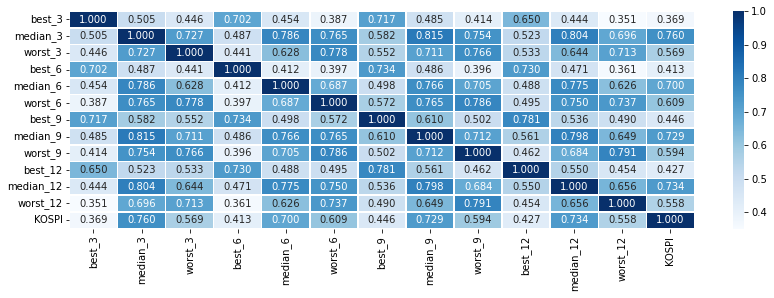

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt=".3f",linewidth=.5,cmap='Blues');

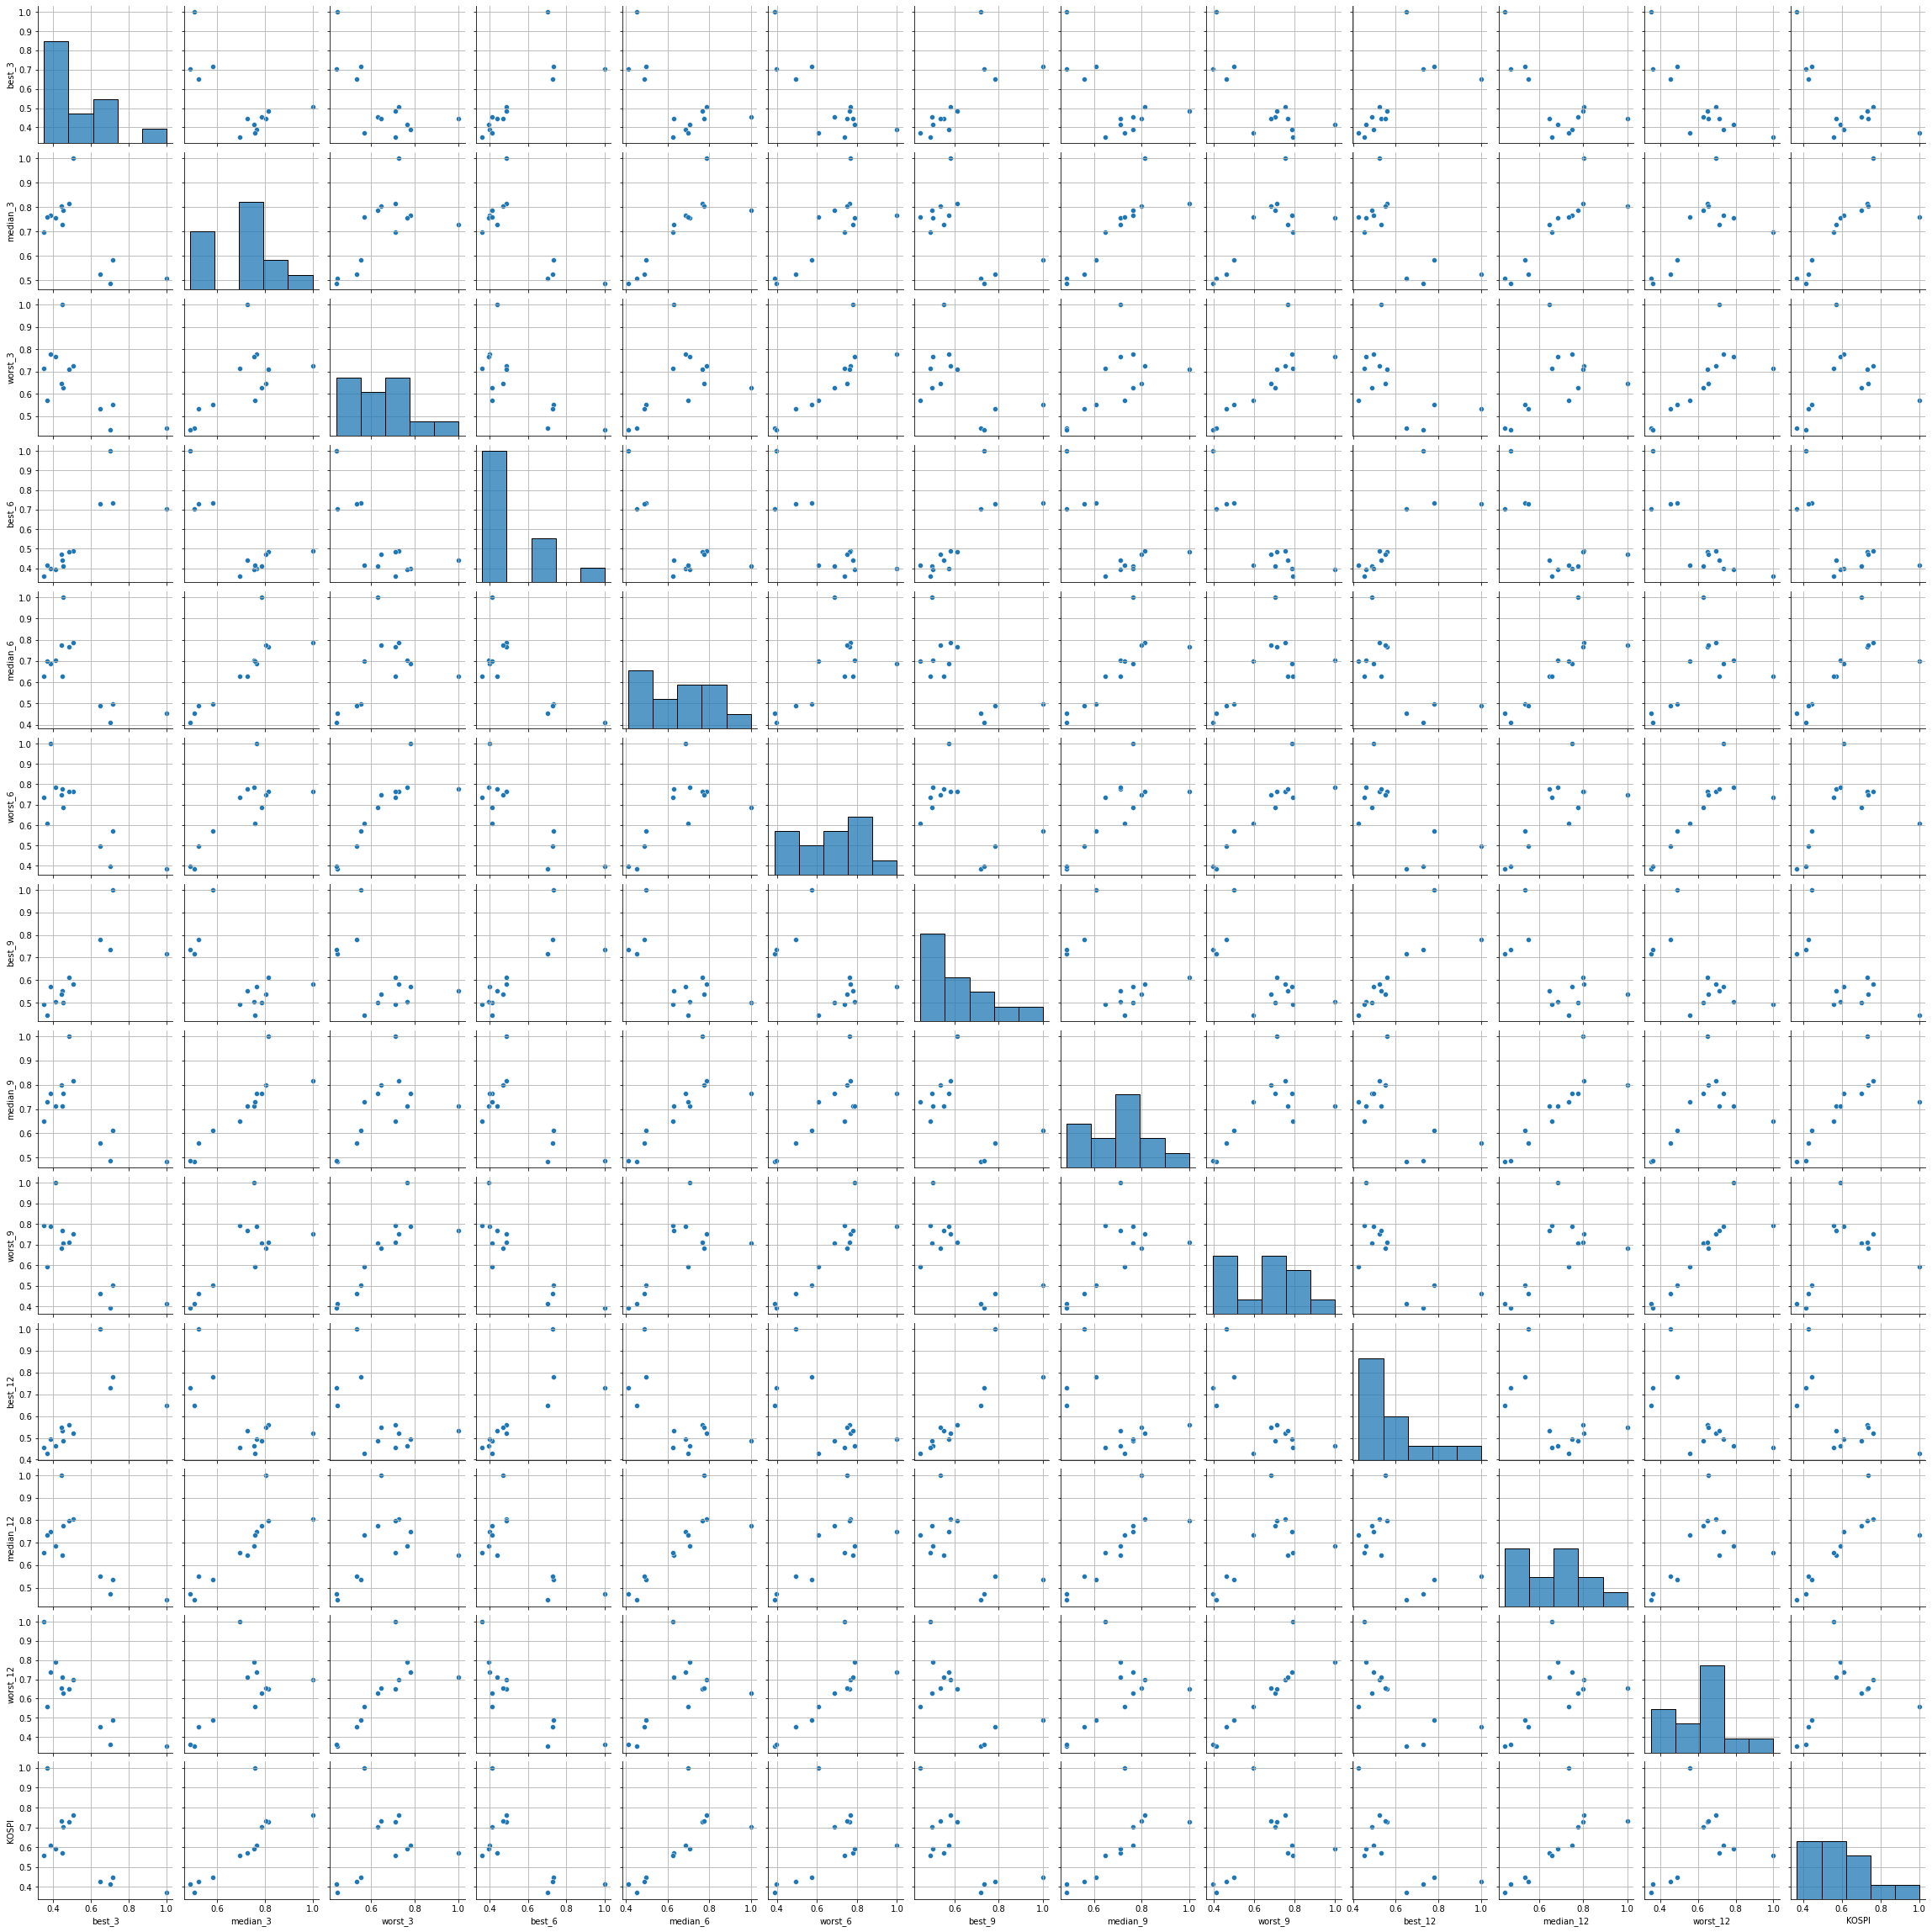

In [ ]:
sns.pairplot(df.corr())

5. 12개 포트폴리오 수익률과 KOSPI지수 수익률의 누적수익률 그래프를 그리시오.(best vs. KOSPI, median vs. KOSPI, worst vs. KOSPI로 구분하여 3개의 그래프로 그릴 것)

In [ ]:
#누적 로그수익률 구하기
acc_rtn = rtns.cumsum()
acc_rtn

,best_3,median_3,worst_3,best_6,median_6,worst_6,best_9,median_9,worst_9,best_12,median_12,worst_12,KOSPI
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004911
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054892
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083260
3,-0.071115,-0.085432,-0.142981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023937
4,-0.078891,-0.076939,-0.105962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-3.547000,0.612258,0.781787,-3.450946,0.686555,0.727319,-2.643527,0.871114,-0.064071,-3.117015,0.852379,0.348045,0.692354
138,-3.539379,0.612620,0.738518,-3.548459,0.678396,0.711976,-2.696909,0.839775,-0.102514,-3.231789,0.796185,0.297074,0.691401
139,-3.566708,0.584575,0.637624,-3.586020,0.648208,0.697956,-2.774245,0.855258,-0.139311,-3.279096,0.782944,0.203974,0.649772
140,-3.634622,0.557891,0.652661,-3.725650,0.608307,0.726452,-2.719753,0.864377,-0.162598,-3.346561,0.809201,0.160095,0.617270


findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


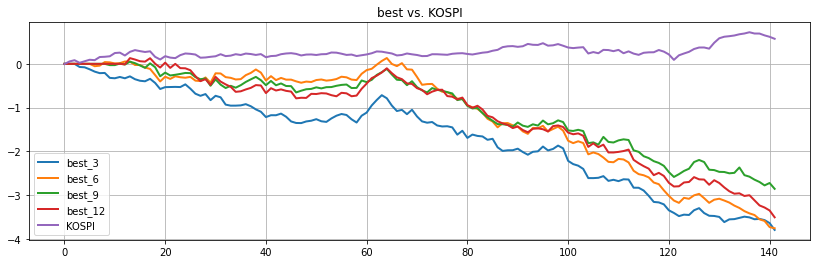

In [ ]:
#best vs. KOSPI
plt.plot(acc_rtn[['best_3','best_6','best_9','best_12','KOSPI']])
plt.title('best vs. KOSPI')
plt.legend(['best_3','best_6','best_9','best_12','KOSPI'])

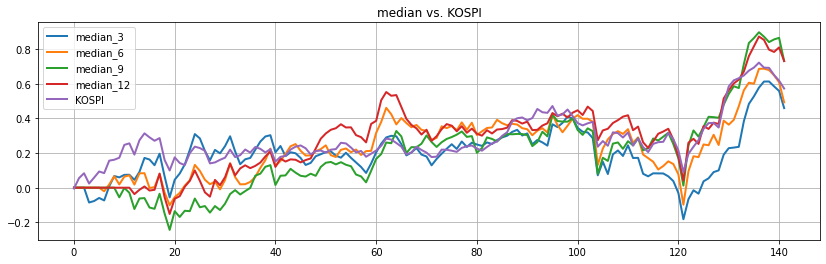

In [ ]:
#median vs. KOSPI
plt.plot(acc_rtn[['median_3','median_6','median_9','median_12','KOSPI']])
plt.title('median vs. KOSPI')
plt.legend(['median_3','median_6','median_9','median_12','KOSPI'])

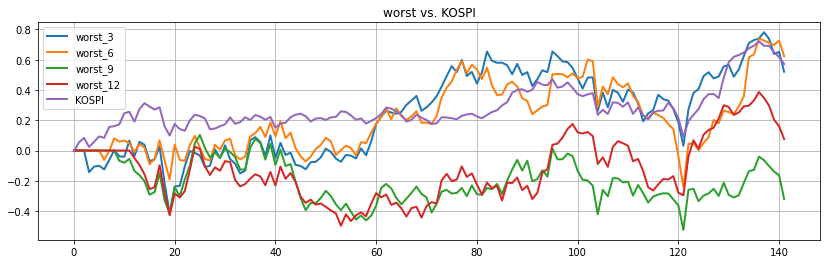

In [ ]:
#worst vs. KOSPI
plt.plot(acc_rtn[['worst_3','worst_6','worst_9','worst_12','KOSPI']])
plt.title('worst vs. KOSPI')
plt.legend(['worst_3','worst_6','worst_9','worst_12','KOSPI'])

6. 위 결과를 바탕으로 최적의 투자전략을 제시하고, 그 근거를 설명하시오.(누적수익률, 평균, 변동성, 왜도, 첨도, CV, Sharpe Ratio 등을 활용하시오)

In [ ]:
#보유기간 누적 수익률
hpr = np.exp(acc_rtn.iloc[-1]) - 1
hpr

best_3      -0.977419
median_3     0.582665
worst_3      0.683946
best_6      -0.976563
median_6     0.636162
worst_6      0.863532
best_9      -0.942314
median_9     1.077203
worst_9     -0.273567
best_12     -0.969889
median_12    1.075904
worst_12     0.078722
KOSPI        0.771690
Name: 141, dtype: float64

In [ ]:
#Sharpe Ratio를 통계량에 추가하기
rf_rate = 0.02
sr = (stats.loc['mean'][:] * 12 - rf_rate) / stats.loc['std'][:]
stats.loc['Sharpe Ratio'] = sr.tolist()
stats

,best_3,median_3,worst_3,best_6,median_6,worst_6,best_9,median_9,worst_9,best_12,median_12,worst_12,KOSPI
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,-0.026855,0.002958,0.003503,-0.028992,0.003239,0.004408,-0.021992,0.005848,-0.002037,-0.026945,0.005618,0.000583,0.002431
std,0.079702,0.055515,0.081176,0.080652,0.058113,0.083573,0.084045,0.059593,0.077497,0.083349,0.054487,0.074112,0.042046
min,-0.285712,-0.214722,-0.244491,-0.257023,-0.249062,-0.299955,-0.275711,-0.246288,-0.188569,-0.253372,-0.168721,-0.186548,-0.143579
25%,-0.073759,-0.027060,-0.044980,-0.079910,-0.028106,-0.043781,-0.074660,-0.023486,-0.053762,-0.086724,-0.023204,-0.052521,-0.020397
50%,-0.022052,0.007545,0.005247,-0.033951,0.003779,0.001824,-0.025850,0.006901,-0.003481,-0.034238,0.013045,0.001075,0.006061
75%,0.028700,0.036416,0.058386,0.023830,0.039677,0.051705,0.034987,0.037717,0.044544,0.023951,0.033872,0.039957,0.027984
max,0.162327,0.147483,0.240028,0.214914,0.192443,0.282491,0.177501,0.230957,0.265093,0.182725,0.218849,0.257466,0.133652
var,0.006352,0.003082,0.006590,0.006505,0.003377,0.006984,0.007064,0.003551,0.006006,0.006947,0.002969,0.005493,0.001768
skew,-0.301776,-0.519417,-0.152881,-0.004229,-0.519476,0.138177,-0.207376,-0.373186,0.332526,0.044914,0.021999,0.346581,-0.338846


7. 모멘텀 기간의 변화(k = 2~12)에 따른 portfolio(best, median, worst)의 누적수익률 추이를 그래프로 출력하시오.(x축: 모멘텀 기간의 변화(k), y축: 모멘텀 기간의 변화에 따른 KOSPI 및 포트폴리오별 누적수익률 추이) 즉, 표는 모두 12개가 그려져야 함.

In [ ]:
#연속시간 수익률 계산 함수
def log_return(data, period):
  rtn = (np.log(data) - np.log(data.shift(period)))
  rtn.columns = data.columns
  return rtn

In [ ]:
#각 모멘텀별 수익률
rtn_1 = log_return(stocks_m,1)
rtn_2 = log_return(stocks_m,2)
rtn_3 = log_return(stocks_m,3)
rtn_4 = log_return(stocks_m,4)
rtn_5 = log_return(stocks_m,5)
rtn_6 = log_return(stocks_m,6)
rtn_7 = log_return(stocks_m,7)
rtn_8 = log_return(stocks_m,8)
rtn_9 = log_return(stocks_m,9)
rtn_10 = log_return(stocks_m,10)
rtn_11 = log_return(stocks_m,11)
rtn_12 = log_return(stocks_m,12)

In [ ]:
#포트폴리오 생성 함수
def make_portfolio(data, rtn=rtn_1):
  b_rtns = []
  m_rtns = []
  w_rtns = []

  for i in range(len(data)-1):
    momentum_df = pd.DataFrame(data.iloc[i])
    momentum_df.columns = ['모멘텀']
    momentum_df.dropna(axis=0,inplace=True)
    momentum_df = momentum_df[momentum_df['모멘텀'] != 0]
    momentum_df['순위'] = momentum_df['모멘텀'].rank(ascending=False)
    momentum_df.sort_values('순위',inplace=True)

    #best portfolilo
    best_portfolio = momentum_df.iloc[20:40]
    b_rtn = []
    for j in best_portfolio.index:
      b_rtn.append(rtn[j][i+1])

    b_rtns.append(np.mean(b_rtn))

    #median portfolio
    median = round(len(momentum_df)/2) - 10
    median_portfolio = momentum_df.iloc[median:median+20]
    m_rtn = []
    for j in median_portfolio.index:
      m_rtn.append(rtn[j][i+1])

    m_rtns.append(np.mean(m_rtn))

    #worst portfolio
    worst_portfolio = momentum_df.iloc[-51:-31]
    w_rtn = []
    for j in worst_portfolio.index:
      w_rtn.append(rtn[j][i+1])

    w_rtns.append(np.mean(w_rtn))

  rtns_3 = pd.DataFrame({'best':b_rtns,'median':m_rtns,'worst':w_rtns})
  return rtns_3

In [ ]:
#각 모멘텀별 전략과 전략의 수익률
rtns_2 = make_portfolio(rtn_2)
rtns_2.fillna(value=0,inplace=True)
rtns_2.columns = ['best_2','median_2','worst_2']
rtns_3 = make_portfolio(rtn_3)
rtns_3.fillna(value=0,inplace=True)
rtns_3.columns = ['best_3','median_3','worst_3']
rtns_4 = make_portfolio(rtn_4)
rtns_4.fillna(value=0,inplace=True)
rtns_4.columns = ['best_4','median_4','worst_4']
rtns_5 = make_portfolio(rtn_5)
rtns_5.fillna(value=0,inplace=True)
rtns_5.columns = ['best_5','median_5','worst_5']
rtns_6 = make_portfolio(rtn_6)
rtns_6.fillna(value=0,inplace=True)
rtns_6.columns = ['best_6','median_6','worst_6']
rtns_7 = make_portfolio(rtn_7)
rtns_7.fillna(value=0,inplace=True)
rtns_7.columns = ['best_7','median_7','worst_7']
rtns_8 = make_portfolio(rtn_8)
rtns_8.fillna(value=0,inplace=True)
rtns_8.columns = ['best_8','median_8','worst_8']
rtns_9 = make_portfolio(rtn_9)
rtns_9.fillna(value=0,inplace=True)
rtns_9.columns = ['best_9','median_9','worst_9']
rtns_10 = make_portfolio(rtn_10)
rtns_10.fillna(value=0,inplace=True)
rtns_10.columns = ['best_10','median_10','worst_10']
rtns_11 = make_portfolio(rtn_11)
rtns_11.fillna(value=0,inplace=True)
rtns_11.columns = ['best_11','median_11','worst_11']
rtns_12 = make_portfolio(rtn_12)
rtns_12.fillna(value=0,inplace=True)
rtns_12.columns = ['best_12','median_12','worst_12']

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **

In [ ]:
#전략들의 수익률 데이터 합치기
rtns = pd.concat([rtns_2,rtns_3,rtns_4,rtns_5,rtns_6,rtns_7,rtns_8,rtns_9,rtns_10,rtns_11,rtns_12],axis=1)
rtns

,best_2,median_2,worst_2,best_3,median_3,worst_3,best_4,median_4,worst_4,best_5,median_5,worst_5,best_6,median_6,worst_6,best_7,median_7,worst_7,best_8,median_8,worst_8,best_9,median_9,worst_9,best_10,median_10,worst_10,best_11,median_11,worst_11,best_12,median_12,worst_12
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.026378,0.031395,-0.010861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.091441,-0.083360,-0.071437,-0.071115,-0.085432,-0.142981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.024106,0.036483,0.074225,-0.007776,0.008494,0.037019,0.060250,-0.000024,-0.003470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.070386,0.003107,-0.008475,-0.042276,0.035106,0.041611,-0.038566,0.009538,-0.065681,-0.007706,-0.020848,0.032474,-0.038112,0.000978,-0.011404,-0.019738,-0.038306,-0.023200,-0.036726,-0.046499,-0.052611,-0.068120,-0.025531,-0.023940,-0.052774,-0.016855,0.018899,-0.104183,-0.028752,0.021650,-0.118292,-0.019721,-0.038579
138,-0.073522,-0.011150,-0.042044,0.007620,0.000362,-0.043270,0.010038,-0.069834,-0.080798,-0.050819,-0.043714,-0.020504,-0.097513,-0.008159,-0.015343,-0.120532,-0.005627,-0.004766,-0.074847,-0.038992,-0.024342,-0.053382,-0.031339,-0.038444,0.010275,-0.023644,-0.022368,-0.040790,-0.027861,-0.057951,-0.114775,-0.056194,-0.050971
139,-0.024410,-0.029722,-0.025117,-0.027329,-0.028045,-0.100893,-0.033495,-0.052516,-0.052853,0.002469,-0.027869,-0.009656,-0.037561,-0.030188,-0.014020,-0.007087,-0.052840,-0.042651,0.028205,-0.047802,-0.044975,-0.077336,0.015483,-0.036796,-0.032896,0.000209,-0.061128,-0.085273,-0.023104,-0.069427,-0.047306,-0.013241,-0.093100
140,-0.079532,-0.002665,0.058696,-0.067914,-0.026684,0.015036,-0.026018,0.000700,0.016647,-0.086209,-0.014483,-0.020299,-0.139631,-0.039901,0.028496,-0.037705,-0.023175,-0.032612,0.003257,-0.005800,-0.040649,0.054492,0.009119,-0.023287,0.063582,-0.018268,-0.067874,0.019208,0.005696,-0.007559,-0.067466,0.026257,-0.043879


In [ ]:
#코스피지수도 넣기
rtns = rtns.merge(kospi,on=kospi.index)

In [ ]:
rtns.drop(columns=['key_0'],axis=1,inplace=True)
rtns

,best_2,median_2,worst_2,best_3,median_3,worst_3,best_4,median_4,worst_4,best_5,median_5,worst_5,best_6,median_6,worst_6,best_7,median_7,worst_7,best_8,median_8,worst_8,best_9,median_9,worst_9,best_10,median_10,worst_10,best_11,median_11,worst_11,best_12,median_12,worst_12,KOSPI
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004911
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059803
2,0.026378,0.031395,-0.010861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028368
3,-0.091441,-0.083360,-0.071437,-0.071115,-0.085432,-0.142981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.059323
4,-0.024106,0.036483,0.074225,-0.007776,0.008494,0.037019,0.060250,-0.000024,-0.003470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.070386,0.003107,-0.008475,-0.042276,0.035106,0.041611,-0.038566,0.009538,-0.065681,-0.007706,-0.020848,0.032474,-0.038112,0.000978,-0.011404,-0.019738,-0.038306,-0.023200,-0.036726,-0.046499,-0.052611,-0.068120,-0.025531,-0.023940,-0.052774,-0.016855,0.018899,-0.104183,-0.028752,0.021650,-0.118292,-0.019721,-0.038579,-0.029040
138,-0.073522,-0.011150,-0.042044,0.007620,0.000362,-0.043270,0.010038,-0.069834,-0.080798,-0.050819,-0.043714,-0.020504,-0.097513,-0.008159,-0.015343,-0.120532,-0.005627,-0.004766,-0.074847,-0.038992,-0.024342,-0.053382,-0.031339,-0.038444,0.010275,-0.023644,-0.022368,-0.040790,-0.027861,-0.057951,-0.114775,-0.056194,-0.050971,-0.000953
139,-0.024410,-0.029722,-0.025117,-0.027329,-0.028045,-0.100893,-0.033495,-0.052516,-0.052853,0.002469,-0.027869,-0.009656,-0.037561,-0.030188,-0.014020,-0.007087,-0.052840,-0.042651,0.028205,-0.047802,-0.044975,-0.077336,0.015483,-0.036796,-0.032896,0.000209,-0.061128,-0.085273,-0.023104,-0.069427,-0.047306,-0.013241,-0.093100,-0.041630
140,-0.079532,-0.002665,0.058696,-0.067914,-0.026684,0.015036,-0.026018,0.000700,0.016647,-0.086209,-0.014483,-0.020299,-0.139631,-0.039901,0.028496,-0.037705,-0.023175,-0.032612,0.003257,-0.005800,-0.040649,0.054492,0.009119,-0.023287,0.063582,-0.018268,-0.067874,0.019208,0.005696,-0.007559,-0.067466,0.026257,-0.043879,-0.032502


In [ ]:
#각 전략들의 누적 로그수익률 구하기
acc_rtn = rtns.cumsum()
acc_rtn

,best_2,median_2,worst_2,best_3,median_3,worst_3,best_4,median_4,worst_4,best_5,median_5,worst_5,best_6,median_6,worst_6,best_7,median_7,worst_7,best_8,median_8,worst_8,best_9,median_9,worst_9,best_10,median_10,worst_10,best_11,median_11,worst_11,best_12,median_12,worst_12,KOSPI
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004911
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054892
2,0.026378,0.031395,-0.010861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083260
3,-0.065063,-0.051965,-0.082298,-0.071115,-0.085432,-0.142981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023937
4,-0.089169,-0.015482,-0.008073,-0.078891,-0.076939,-0.105962,0.060250,-0.000024,-0.003470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-3.938857,1.221154,0.565339,-3.547000,0.612258,0.781787,-3.311535,1.305278,1.382746,-3.265118,0.790013,2.048353,-3.450946,0.686555,0.727319,-2.557017,0.645981,0.795737,-2.726400,0.591017,0.661156,-2.643527,0.871114,-0.064071,-3.156237,0.950024,0.209216,-3.171541,1.476295,0.312758,-3.117015,0.852379,0.348045,0.692354
138,-4.012379,1.210005,0.523295,-3.539379,0.612620,0.738518,-3.301497,1.235444,1.301948,-3.315937,0.746299,2.027849,-3.548459,0.678396,0.711976,-2.677549,0.640353,0.790971,-2.801247,0.552025,0.636814,-2.696909,0.839775,-0.102514,-3.145962,0.926380,0.186848,-3.212331,1.448434,0.254808,-3.231789,0.796185,0.297074,0.691401
139,-4.036788,1.180283,0.498178,-3.566708,0.584575,0.637624,-3.334992,1.182928,1.249095,-3.313469,0.718430,2.018193,-3.586020,0.648208,0.697956,-2.684636,0.587514,0.748320,-2.773042,0.504223,0.591839,-2.774245,0.855258,-0.139311,-3.178858,0.926589,0.125719,-3.297604,1.425330,0.185381,-3.279096,0.782944,0.203974,0.649772
140,-4.116321,1.177618,0.556875,-3.634622,0.557891,0.652661,-3.361010,1.183628,1.265741,-3.399677,0.703946,1.997894,-3.725650,0.608307,0.726452,-2.722341,0.564339,0.715708,-2.769786,0.498423,0.551190,-2.719753,0.864377,-0.162598,-3.115276,0.908321,0.057846,-3.278396,1.431025,0.177821,-3.346561,0.809201,0.160095,0.617270


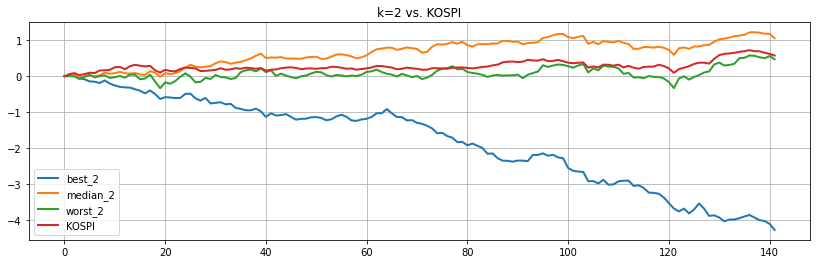

In [ ]:
#k=2 vs. KOSPI
plt.plot(acc_rtn[['best_2','median_2','worst_2','KOSPI']])
plt.title('k=2 vs. KOSPI')
plt.legend(['best_2','median_2','worst_2','KOSPI'])

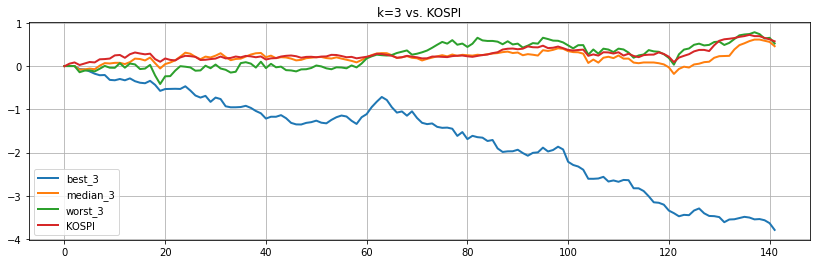

In [ ]:
#k=3 vs. KOSPI
plt.plot(acc_rtn[['best_3','median_3','worst_3','KOSPI']])
plt.title('k=3 vs. KOSPI')
plt.legend(['best_3','median_3','worst_3','KOSPI'])

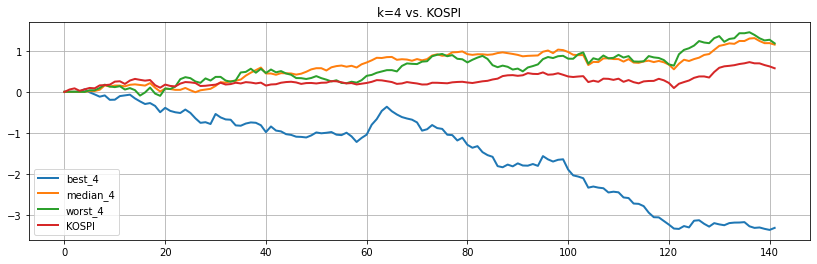

In [ ]:
#k=4 vs. KOSPI
plt.plot(acc_rtn[['best_4','median_4','worst_4','KOSPI']])
plt.title('k=4 vs. KOSPI')
plt.legend(['best_4','median_4','worst_4','KOSPI'])

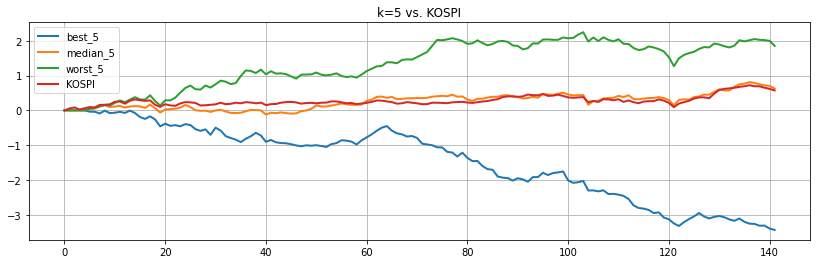

In [ ]:
#k=5 vs. KOSPI
plt.plot(acc_rtn[['best_5','median_5','worst_5','KOSPI']])
plt.title('k=5 vs. KOSPI')
plt.legend(['best_5','median_5','worst_5','KOSPI'])

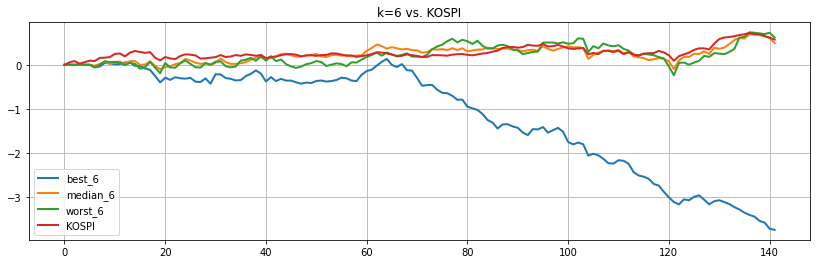

In [ ]:
#k=6 vs. KOSPI
plt.plot(acc_rtn[['best_6','median_6','worst_6','KOSPI']])
plt.title('k=6 vs. KOSPI')
plt.legend(['best_6','median_6','worst_6','KOSPI'])

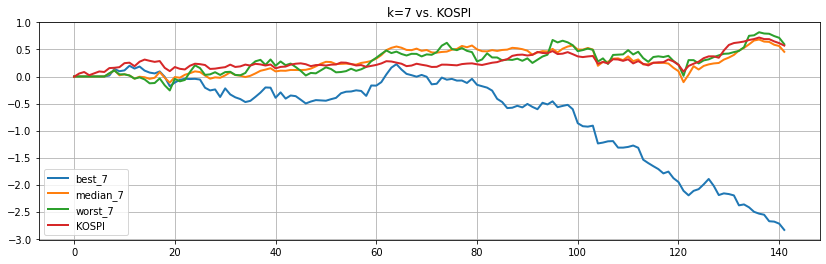

In [ ]:
#k=7 vs. KOSPI
plt.plot(acc_rtn[['best_7','median_7','worst_7','KOSPI']])
plt.title('k=7 vs. KOSPI')
plt.legend(['best_7','median_7','worst_7','KOSPI'])

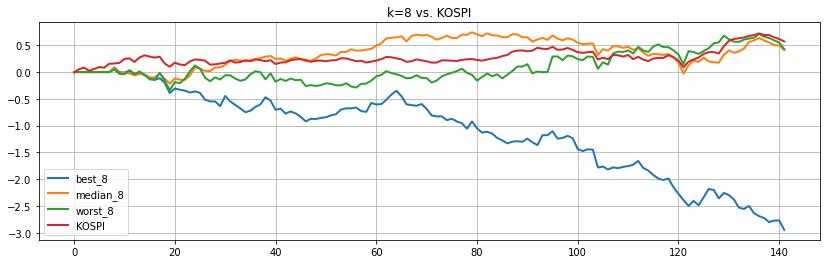

In [ ]:
#k=8 vs. KOSPI
plt.plot(acc_rtn[['best_8','median_8','worst_8','KOSPI']])
plt.title('k=8 vs. KOSPI')
plt.legend(['best_8','median_8','worst_8','KOSPI'])

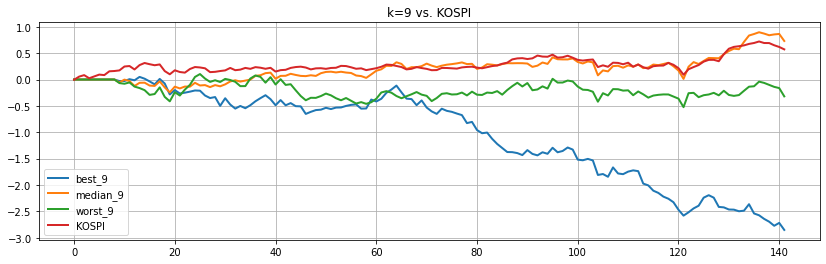

In [ ]:
#k=9 vs. KOSPI
plt.plot(acc_rtn[['best_9','median_9','worst_9','KOSPI']])
plt.title('k=9 vs. KOSPI')
plt.legend(['best_9','median_9','worst_9','KOSPI'])

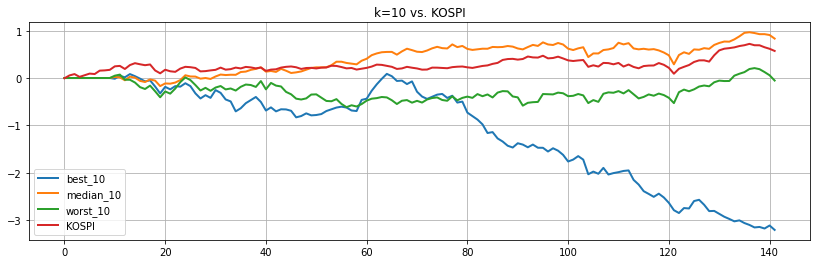

In [ ]:
#k=10 vs. KOSPI
plt.plot(acc_rtn[['best_10','median_10','worst_10','KOSPI']])
plt.title('k=10 vs. KOSPI')
plt.legend(['best_10','median_10','worst_10','KOSPI'])

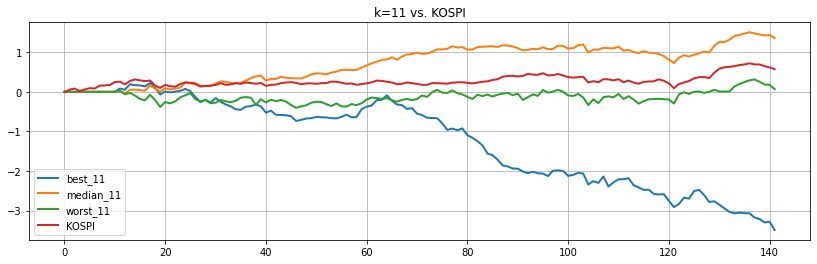

In [ ]:
#k=11 vs. KOSPI
plt.plot(acc_rtn[['best_11','median_11','worst_11','KOSPI']])
plt.title('k=11 vs. KOSPI')
plt.legend(['best_11','median_11','worst_11','KOSPI'])

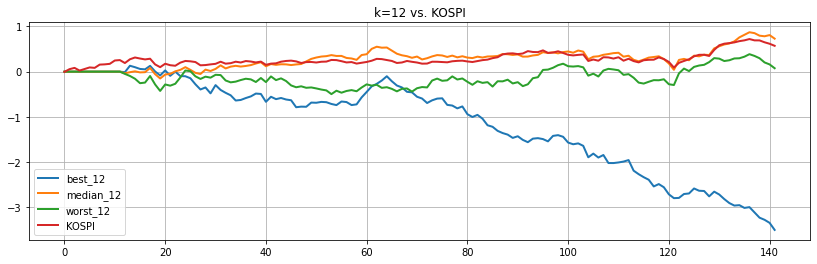

In [ ]:
#k=12 vs. KOSPI
plt.plot(acc_rtn[['best_12','median_12','worst_12','KOSPI']])
plt.title('k=12 vs. KOSPI')
plt.legend(['best_12','median_12','worst_12','KOSPI'])

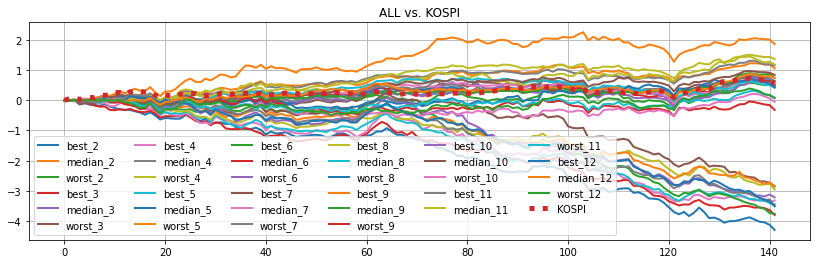

In [ ]:
#전체 vs. KOSPI
plt.plot(acc_rtn[['best_2','median_2','worst_2','best_3','median_3','worst_3','best_4','median_4','worst_4','best_5','median_5','worst_5','best_6','median_6','worst_6',
                  'best_7','median_7','worst_7','best_8','median_8','worst_8','best_9','median_9','worst_9','best_10','median_10','worst_10','best_11','median_11','worst_11','best_12','median_12','worst_12']])
plt.plot(acc_rtn['KOSPI'], lw=5, ls=':')
plt.title('ALL vs. KOSPI')
plt.legend(['best_2','median_2','worst_2','best_3','median_3','worst_3','best_4','median_4','worst_4','best_5','median_5','worst_5','best_6','median_6','worst_6',
                  'best_7','median_7','worst_7','best_8','median_8','worst_8','best_9','median_9','worst_9','best_10','median_10','worst_10','best_11','median_11','worst_11','best_12','median_12','worst_12','KOSPI'],
           loc = 'lower left',ncol=6)

8. 위 33개 전략의 성과를 KOSPI(벤치마크)와 대비하여 비교하여 설명하시오.(누적수익률, 평균, 변동성, 왜도, 첨도, CV, Sharpe Ratio등을 활용하시오)

In [ ]:
#보유기간 누적 수익률
hpr = np.exp(acc_rtn.iloc[-1]) - 1
hpr

best_2      -0.986217
median_2     1.866240
worst_2      0.595184
best_3      -0.977419
median_3     0.582665
worst_3      0.683946
best_4      -0.963531
median_4     2.149370
worst_4      2.250200
best_5      -0.967859
median_5     0.871730
worst_5      5.386124
best_6      -0.976563
median_6     0.636162
worst_6      0.863532
best_7      -0.941464
median_7     0.579236
worst_7      0.819717
best_8      -0.947531
median_8     0.509664
worst_8      0.533877
best_9      -0.942314
median_9     1.077203
worst_9     -0.273567
best_10     -0.959587
median_10    1.299799
worst_10    -0.051916
best_11     -0.969388
median_11    2.892660
worst_11     0.071819
best_12     -0.969889
median_12    1.075904
worst_12     0.078722
KOSPI        0.771690
Name: 141, dtype: float64

In [ ]:
#KOSPI보다 높은 수익률을 보인 전략
good_portfolio = hpr.loc[hpr >= hpr[-1]]
print(good_portfolio)
good_portfolio.index

median_2     1.866240
median_4     2.149370
worst_4      2.250200
median_5     0.871730
worst_5      5.386124
worst_6      0.863532
worst_7      0.819717
median_9     1.077203
median_10    1.299799
median_11    2.892660
median_12    1.075904
KOSPI        0.771690
Name: 141, dtype: float64


Index(['median_2', 'median_4', 'worst_4', 'median_5', 'worst_5', 'worst_6',
       'worst_7', 'median_9', 'median_10', 'median_11', 'median_12', 'KOSPI'],
      dtype='object')

In [ ]:
#전략의 통계량
df = rtns.loc[12:]
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.loc['CV'] = (df.mean() / df.std()).tolist()
rf_rate = 0.02
sr = (stats.loc['mean'][:] * 12 - rf_rate) / stats.loc['std'][:]
stats.loc['Sharpe Ratio'] = sr.tolist()
stats

,best_2,median_2,worst_2,best_3,median_3,worst_3,best_4,median_4,worst_4,best_5,median_5,worst_5,best_6,median_6,worst_6,best_7,median_7,worst_7,best_8,median_8,worst_8,best_9,median_9,worst_9,best_10,median_10,worst_10,best_11,median_11,worst_11,best_12,median_12,worst_12,KOSPI
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,-0.030644,0.007175,0.003558,-0.026855,0.002958,0.003503,-0.024663,0.007666,0.008019,-0.026120,0.003863,0.012072,-0.028992,0.003239,0.004408,-0.023358,0.003364,0.004464,-0.022864,0.003366,0.003008,-0.021992,0.005848,-0.002037,-0.025036,0.006309,-0.000965,-0.027468,0.010283,0.000386,-0.026945,0.005618,0.000583,0.002431
std,0.079709,0.058106,0.081579,0.079702,0.055515,0.081176,0.089290,0.054138,0.080014,0.083270,0.055653,0.086807,0.080652,0.058113,0.083573,0.083784,0.057420,0.081567,0.083546,0.059157,0.081525,0.084045,0.059593,0.077497,0.091840,0.053773,0.073374,0.088843,0.053787,0.075115,0.083349,0.054487,0.074112,0.042046
min,-0.270935,-0.220579,-0.234015,-0.285712,-0.214722,-0.244491,-0.250068,-0.242946,-0.275220,-0.274159,-0.275499,-0.266982,-0.257023,-0.249062,-0.299955,-0.329385,-0.299118,-0.217478,-0.333527,-0.215385,-0.218565,-0.275711,-0.246288,-0.188569,-0.309268,-0.207482,-0.174947,-0.276007,-0.204477,-0.188939,-0.253372,-0.168721,-0.186548,-0.143579
25%,-0.078717,-0.020923,-0.044395,-0.073759,-0.027060,-0.044980,-0.077864,-0.019789,-0.049387,-0.073871,-0.021189,-0.041762,-0.079910,-0.028106,-0.043781,-0.068375,-0.023084,-0.049850,-0.071911,-0.034244,-0.047055,-0.074660,-0.023486,-0.053762,-0.079821,-0.021574,-0.055585,-0.085224,-0.023547,-0.052261,-0.086724,-0.023204,-0.052521,-0.020397
50%,-0.021541,0.010278,0.009528,-0.022052,0.007545,0.005247,-0.027067,0.009658,0.009707,-0.027933,0.007182,0.006891,-0.033951,0.003779,0.001824,-0.014203,0.007689,0.007770,-0.023978,-0.000263,-0.001981,-0.025850,0.006901,-0.003481,-0.038632,0.006325,-0.002653,-0.017170,0.008207,0.001613,-0.034238,0.013045,0.001075,0.006061
75%,0.017525,0.042324,0.054069,0.028700,0.036416,0.058386,0.017739,0.040288,0.052897,0.027772,0.031675,0.074242,0.023830,0.039677,0.051705,0.026347,0.034921,0.046904,0.024822,0.037534,0.052422,0.034987,0.037717,0.044544,0.043045,0.039988,0.045383,0.025889,0.046604,0.051112,0.023951,0.033872,0.039957,0.027984
max,0.172815,0.185406,0.265560,0.162327,0.147483,0.240028,0.244277,0.134003,0.276459,0.205192,0.160998,0.224856,0.214914,0.192443,0.282491,0.192523,0.156325,0.290810,0.190252,0.156084,0.289783,0.177501,0.230957,0.265093,0.235276,0.195958,0.230691,0.197447,0.167771,0.230441,0.182725,0.218849,0.257466,0.133652
var,0.006354,0.003376,0.006655,0.006352,0.003082,0.006590,0.007973,0.002931,0.006402,0.006934,0.003097,0.007535,0.006505,0.003377,0.006984,0.007020,0.003297,0.006653,0.006980,0.003500,0.006646,0.007064,0.003551,0.006006,0.008435,0.002892,0.005384,0.007893,0.002893,0.005642,0.006947,0.002969,0.005493,0.001768
skew,-0.214715,-0.526128,-0.048283,-0.301776,-0.519417,-0.152881,0.438017,-0.866134,0.058888,-0.175648,-1.039222,-0.299748,-0.004229,-0.519476,0.138177,-0.488679,-1.378309,0.449508,-0.149380,-0.335039,0.206539,-0.207376,-0.373186,0.332526,-0.077644,-0.559756,0.138051,-0.079684,-0.312788,-0.019297,0.044914,0.021999,0.346581,-0.338846


In [ ]:
#KOSPI보다 수익률이 높은 전략의 통계량
good_st = stats[good_portfolio.index]
good_st

,median_2,median_4,worst_4,median_5,worst_5,worst_6,worst_7,median_9,median_10,median_11,median_12,KOSPI
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.007175,0.007666,0.008019,0.003863,0.012072,0.004408,0.004464,0.005848,0.006309,0.010283,0.005618,0.002431
std,0.058106,0.054138,0.080014,0.055653,0.086807,0.083573,0.081567,0.059593,0.053773,0.053787,0.054487,0.042046
min,-0.220579,-0.242946,-0.275220,-0.275499,-0.266982,-0.299955,-0.217478,-0.246288,-0.207482,-0.204477,-0.168721,-0.143579
25%,-0.020923,-0.019789,-0.049387,-0.021189,-0.041762,-0.043781,-0.049850,-0.023486,-0.021574,-0.023547,-0.023204,-0.020397
50%,0.010278,0.009658,0.009707,0.007182,0.006891,0.001824,0.007770,0.006901,0.006325,0.008207,0.013045,0.006061
75%,0.042324,0.040288,0.052897,0.031675,0.074242,0.051705,0.046904,0.037717,0.039988,0.046604,0.033872,0.027984
max,0.185406,0.134003,0.276459,0.160998,0.224856,0.282491,0.290810,0.230957,0.195958,0.167771,0.218849,0.133652
var,0.003376,0.002931,0.006402,0.003097,0.007535,0.006984,0.006653,0.003551,0.002892,0.002893,0.002969,0.001768
skew,-0.526128,-0.866134,0.058888,-1.039222,-0.299748,0.138177,0.449508,-0.373186,-0.559756,-0.312788,0.021999,-0.338846
